1. Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns

In [2]:
df_cast = pd.read_csv("cast.csv")
df_cast

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0


In [3]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [4]:
df_cast = df_cast.drop(["Secchi","ForelU","Order_Occ","Cruz_Leg","IntChl","IntC14","Inc_Str","Inc_End","PST_LAN","Civil_T","TimeZone","Wave_Dir","Wave_Prd","Cloud_Typ","Dry_T","Wet_T","Cloud_Typ","Cloud_Amt","Visibility","Wave_Ht"],axis=1)
df_cast # drop columns 
df_cast

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Wea
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,31CR,HY,1.0,054 56,NaN,4903,23.0,18.0,NaN,2.0
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,31CR,HY,2.0,052 75,NaN,4903,16.0,5.0,NaN,4.0
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,31CR,HY,3.0,051 85,NaN,4903,23.0,5.0,NaN,6.0
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,31CR,HY,4.0,050 95,NaN,4903,18.0,8.0,NaN,2.0
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,31CR,HY,5.0,050 104,NaN,4903,27.0,13.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,33SR,MX,168.0,93.3 90.0,3101,1611,34.0,16.0,1017.5,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,33SR,MX,177.0,93.3 100.0,3101,1611,36.0,14.0,1019.6,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,33SR,MX,186.0,93.3 110.0,3101,1611,35.0,16.0,1018.6,1.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,33SR,MX,212.0,93.3 120.0,3101,1611,36.0,16.0,1016.3,1.0


In [5]:
df_cast.isna().sum() # checking how many rows have NAN.

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Ship_Name       1690
Ship_Code          0
Data_Type          0
Event_Num          3
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
Wind_Dir        1476
Wind_Spd        1679
Barometer      15341
Wea             7597
dtype: int64

In [6]:
df_cast= df_cast.dropna() # droping the na rows
df_cast

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Wea
15707,15708,1969-01-14-C-31JD,196901,19690106000520,6000520,19-6901JD-HY-025-0310-06000520,060.0 052.0,1,NST,-11.260,...,31JD,HY,2076.0,60 052,3101.0,6901,11.0,16.0,1004.4,2.0
15708,15709,1969-01-14-C-31JD,196901,19690106000600,6000600,19-6901JD-HY-025-0810-06000600,060.0 060.0,1,OCO,-44.060,...,31JD,HY,2077.0,60 060,3101.0,6901,18.0,16.0,1001.0,5.0
15709,15710,1969-01-14-C-31JD,196901,19690106000800,6000800,19-6901JD-HY-025-1849-06000800,060.0 080.0,1,OCO,-124.260,...,31JD,HY,2078.0,60 080,3101.0,6901,20.0,10.0,1000.3,2.0
15710,15711,1969-01-14-C-31JD,196901,19690106330520,6330520,19-6901JD-HY-024-2119-06330520,063.3 052.0,1,OCO,-9.670,...,31JD,HY,2079.0,63 052,3101.0,6901,15.0,9.0,1007.5,4.0
15711,15712,1969-01-14-C-31JD,196901,19690106330580,6330580,19-6901JD-HY-024-1654-06330580,063.3 058.0,1,NST,-36.080,...,31JD,HY,2080.0,63 058,3101.0,6901,21.0,10.0,1009.8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34397,34398,2016-11-06-C-33SR,201611,20161109330700,9330700,20-1611SR-PR-312-16:29-09330700,093.3 070.0,4,ST,-174.549,...,33SR,PR,145.0,93.3 70.0,3101,1611,34.0,12.0,1018.0,1.0
34398,34399,2016-11-06-C-33SR,201611,20161109330800,9330800,20-1611SR-MX-312-21:35-09330800,093.3 080.0,4,ST,-214.544,...,33SR,MX,155.0,93.3 80.0,3101,1611,24.0,16.0,1016.9,2.0
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,33SR,MX,186.0,93.3 110.0,3101,1611,35.0,16.0,1018.6,1.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,33SR,MX,212.0,93.3 120.0,3101,1611,36.0,16.0,1016.3,1.0


In [7]:
df_cast.isnull().sum()

Cst_Cnt        0
Cruise_ID      0
Cruise         0
Cruz_Sta       0
DbSta_ID       0
Cast_ID        0
Sta_ID         0
Quarter        0
Sta_Code       0
Distance       0
Date           0
Year           0
Month          0
Julian_Date    0
Julian_Day     0
Time           0
Lat_Dec        0
Lat_Deg        0
Lat_Min        0
Lat_Hem        0
Lon_Dec        0
Lon_Deg        0
Lon_Min        0
Lon_Hem        0
Rpt_Line       0
St_Line        0
Ac_Line        0
Rpt_Sta        0
St_Station     0
Ac_Sta         0
Bottom_D       0
Ship_Name      0
Ship_Code      0
Data_Type      0
Event_Num      0
Orig_Sta_ID    0
Data_Or        0
Cruz_Num       0
Wind_Dir       0
Wind_Spd       0
Barometer      0
Wea            0
dtype: int64

In [8]:
df_cast.isna().sum()

Cst_Cnt        0
Cruise_ID      0
Cruise         0
Cruz_Sta       0
DbSta_ID       0
Cast_ID        0
Sta_ID         0
Quarter        0
Sta_Code       0
Distance       0
Date           0
Year           0
Month          0
Julian_Date    0
Julian_Day     0
Time           0
Lat_Dec        0
Lat_Deg        0
Lat_Min        0
Lat_Hem        0
Lon_Dec        0
Lon_Deg        0
Lon_Min        0
Lon_Hem        0
Rpt_Line       0
St_Line        0
Ac_Line        0
Rpt_Sta        0
St_Station     0
Ac_Sta         0
Bottom_D       0
Ship_Name      0
Ship_Code      0
Data_Type      0
Event_Num      0
Orig_Sta_ID    0
Data_Or        0
Cruz_Num       0
Wind_Dir       0
Wind_Spd       0
Barometer      0
Wea            0
dtype: int64

In [9]:
df_cast.var()

C:\Users\12674\AppData\Local\Temp/ipykernel_16736/323715479.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cast.var()


Cst_Cnt        2.541540e+07
Cruise         1.882434e+06
Cruz_Sta       1.882437e+22
DbSta_ID       6.238473e+11
Quarter        1.229125e+00
Distance       1.087152e+04
Year           1.882652e+02
Month          1.132272e+01
Julian_Date    2.039194e+07
Julian_Day     1.046836e+04
Lat_Dec        2.323377e+00
Lat_Deg        2.444057e+00
Lat_Min        3.064116e+02
Lon_Dec        4.427694e+00
Lon_Deg        4.545152e+00
Lon_Min        2.928847e+02
Rpt_Line       6.237639e+01
St_Line        6.266645e+01
Ac_Line        6.249384e+01
Rpt_Sta        6.661366e+02
St_Station     6.660918e+02
Ac_Sta         6.662279e+02
Bottom_D       2.819212e+06
Event_Num      2.210381e+06
Wind_Dir       8.973847e+01
Wind_Spd       4.854435e+01
Barometer      2.166528e+01
Wea            1.269804e+00
dtype: float64

In [10]:
cat_columns = df_cast[["Cruise_ID","Cast_ID","Sta_ID","Sta_Code","Lat_Hem","Lon_Hem","Ship_Name","Ship_Code","Data_Type"]].columns
# select categorical columns  and convert to numerical columns.
df_cast[cat_columns] = df_cast[cat_columns].apply(lambda x: pd.factorize(x)[0])
df_cast

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Wea
15707,15708,0,196901,19690106000520,6000520,0,0,1,0,-11.260,...,0,0,2076.0,60 052,3101.0,6901,11.0,16.0,1004.4,2.0
15708,15709,0,196901,19690106000600,6000600,1,1,1,1,-44.060,...,0,0,2077.0,60 060,3101.0,6901,18.0,16.0,1001.0,5.0
15709,15710,0,196901,19690106000800,6000800,2,2,1,1,-124.260,...,0,0,2078.0,60 080,3101.0,6901,20.0,10.0,1000.3,2.0
15710,15711,0,196901,19690106330520,6330520,3,3,1,1,-9.670,...,0,0,2079.0,63 052,3101.0,6901,15.0,9.0,1007.5,4.0
15711,15712,0,196901,19690106330580,6330580,4,4,1,0,-36.080,...,0,0,2080.0,63 058,3101.0,6901,21.0,10.0,1009.8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34397,34398,195,201611,20161109330700,9330700,7179,68,4,3,-174.549,...,15,3,145.0,93.3 70.0,3101,1611,34.0,12.0,1018.0,1.0
34398,34399,195,201611,20161109330800,9330800,7180,85,4,3,-214.544,...,15,4,155.0,93.3 80.0,3101,1611,24.0,16.0,1016.9,2.0
34401,34402,195,201611,20161109331100,9331100,7181,164,4,3,-334.157,...,15,4,186.0,93.3 110.0,3101,1611,35.0,16.0,1018.6,1.0
34402,34403,195,201611,20161109331200,9331200,7182,71,4,3,-373.979,...,15,4,212.0,93.3 120.0,3101,1611,36.0,16.0,1016.3,1.0


# Bottle

In [11]:
df_bottle = pd.read_csv("bottle.csv", usecols = ['Cst_Cnt','Btl_Cnt','Sta_ID','Depth_ID','Depthm','T_degC','Salnty','STheta','RecInd','T_prec','S_prec','O_qual','O2Satq','PO4q','SiO3qu','NO2q','NO3q','R_Depth', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA','R_SVA', 'R_DYNHT','R_PRES'])
# it was very difficult to load this data,so I choose the columns I needed.
df_bottle 

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,SiO3qu,NO2q,NO3q,R_Depth,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,25.64900,3,1.0,...,9.0,9.0,9.0,0.0,10.50,33.440,25.640,233.0,0.000,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,25.65600,3,2.0,...,9.0,9.0,9.0,8.0,10.46,33.440,25.650,232.5,0.010,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,25.65400,7,2.0,...,9.0,9.0,9.0,10.0,10.46,33.437,25.650,232.8,0.020,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,25.64300,3,2.0,...,9.0,9.0,9.0,19.0,10.45,33.420,25.640,234.1,0.040,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,25.64300,7,2.0,...,9.0,9.0,9.0,20.0,10.45,33.421,25.640,234.0,0.040,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,23.87055,7,2.0,...,NaN,NaN,NaN,0.0,18.74,33.408,23.871,402.4,0.000,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,23.87072,3,2.0,...,NaN,NaN,NaN,2.0,18.74,33.408,23.871,402.5,0.008,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,23.88911,3,2.0,...,NaN,NaN,NaN,5.0,18.69,33.415,23.889,400.8,0.020,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,24.01426,3,2.0,...,NaN,NaN,NaN,10.0,18.16,33.406,24.014,389.1,0.040,10


In [12]:
df_bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Cst_Cnt     864863 non-null  int64  
 1   Btl_Cnt     864863 non-null  int64  
 2   Sta_ID      864863 non-null  object 
 3   Depth_ID    864863 non-null  object 
 4   Depthm      864863 non-null  int64  
 5   T_degC      853900 non-null  float64
 6   Salnty      817509 non-null  float64
 7   STheta      812174 non-null  float64
 8   RecInd      864863 non-null  int64  
 9   T_prec      853900 non-null  float64
 10  S_prec      817509 non-null  float64
 11  O_qual      184676 non-null  float64
 12  O2Satq      217797 non-null  float64
 13  PO4q        451786 non-null  float64
 14  SiO3qu      510866 non-null  float64
 15  NO2q        529474 non-null  float64
 16  NO3q        529933 non-null  float64
 17  R_Depth     864863 non-null  float64
 18  R_POTEMP    818816 non-null  float64
 19  R_

In [13]:
df_bottle.isna().sum()

Cst_Cnt            0
Btl_Cnt            0
Sta_ID             0
Depth_ID           0
Depthm             0
T_degC         10963
Salnty         47354
STheta         52689
RecInd             0
T_prec         10963
S_prec         47354
O_qual        680187
O2Satq        647066
PO4q          413077
SiO3qu        353997
NO2q          335389
NO3q          334930
R_Depth            0
R_POTEMP       46047
R_SALINITY     47354
R_SIGMA        52856
R_SVA          52771
R_DYNHT        46657
R_PRES             0
dtype: int64

In [14]:
df_bottle = df_bottle.dropna()
df_bottle # dropping NA values

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,SiO3qu,NO2q,NO3q,R_Depth,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,25.64900,3,1.0,...,9.0,9.0,9.0,0.0,10.50,33.440,25.640,233.0,0.000,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,25.65600,3,2.0,...,9.0,9.0,9.0,8.0,10.46,33.440,25.650,232.5,0.010,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,25.65400,7,2.0,...,9.0,9.0,9.0,10.0,10.46,33.437,25.650,232.8,0.020,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,25.64300,3,2.0,...,9.0,9.0,9.0,19.0,10.45,33.420,25.640,234.1,0.040,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,25.64300,7,2.0,...,9.0,9.0,9.0,20.0,10.45,33.421,25.640,234.0,0.040,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864622,34396,864623,093.3 055.0,20-1611SR-MX-312-0455-09330550-0170A-5,170,9.219,33.8040,26.15299,5,2.0,...,9.0,9.0,9.0,170.0,9.20,33.804,26.153,188.9,0.532,171
864624,34396,864625,093.3 055.0,20-1611SR-MX-312-0455-09330550-0201A-5,201,8.791,33.9538,26.33881,5,2.0,...,9.0,9.0,9.0,201.0,8.77,33.954,26.339,171.8,0.588,203
864671,34398,864672,093.3 070.0,20-1611SR-PR-312-1629-09330700-0012B-6,12,17.959,33.3802,24.04390,6,2.0,...,9.0,9.0,9.0,12.0,17.96,33.380,24.044,386.3,0.047,12
864678,34398,864679,093.3 070.0,20-1611SR-PR-312-1629-09330700-0040B-6,40,16.492,33.3042,24.33510,6,2.0,...,9.0,9.0,9.0,40.0,16.49,33.304,24.335,359.5,0.154,40


In [15]:
df_bottle.isna().sum()

Cst_Cnt       0
Btl_Cnt       0
Sta_ID        0
Depth_ID      0
Depthm        0
T_degC        0
Salnty        0
STheta        0
RecInd        0
T_prec        0
S_prec        0
O_qual        0
O2Satq        0
PO4q          0
SiO3qu        0
NO2q          0
NO3q          0
R_Depth       0
R_POTEMP      0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

In [16]:
df_bottle.isnull().sum() # checking is there null

Cst_Cnt       0
Btl_Cnt       0
Sta_ID        0
Depth_ID      0
Depthm        0
T_degC        0
Salnty        0
STheta        0
RecInd        0
T_prec        0
S_prec        0
O_qual        0
O2Satq        0
PO4q          0
SiO3qu        0
NO2q          0
NO3q          0
R_Depth       0
R_POTEMP      0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

In [17]:
df_bottle.var()

C:\Users\12674\AppData\Local\Temp/ipykernel_16736/2343041935.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bottle.var()


Cst_Cnt       5.197343e+07
Btl_Cnt       3.075190e+10
Depthm        7.896385e+04
T_degC        1.733280e+01
Salnty        2.138718e-01
STheta        2.874667e+00
RecInd        1.836137e+00
T_prec        8.372504e-02
S_prec        2.277774e-01
O_qual        7.523807e-02
O2Satq        8.063849e-02
PO4q          1.141307e-04
SiO3qu        1.141307e-04
NO2q          1.141307e-04
NO3q          1.141307e-04
R_Depth       7.896292e+04
R_POTEMP      1.747588e+01
R_SALINITY    2.138714e-01
R_SIGMA       2.330974e+00
R_SVA         8.333947e+03
R_DYNHT       1.500042e-01
R_PRES        8.040061e+04
dtype: float64

In [18]:
print(df_bottle.dtypes)

Cst_Cnt         int64
Btl_Cnt         int64
Sta_ID         object
Depth_ID       object
Depthm          int64
T_degC        float64
Salnty        float64
STheta        float64
RecInd          int64
T_prec        float64
S_prec        float64
O_qual        float64
O2Satq        float64
PO4q          float64
SiO3qu        float64
NO2q          float64
NO3q          float64
R_Depth       float64
R_POTEMP      float64
R_SALINITY    float64
R_SIGMA       float64
R_SVA         float64
R_DYNHT       float64
R_PRES          int64
dtype: object


In [19]:
cat_columns = df_bottle[["Depth_ID","Sta_ID"]].columns
# select categorical columns  and convert to numerical columns.
df_bottle[cat_columns] = df_bottle[cat_columns].apply(lambda x: pd.factorize(x)[0])
df_bottle

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,SiO3qu,NO2q,NO3q,R_Depth,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,0,0,0,10.500,33.4400,25.64900,3,1.0,...,9.0,9.0,9.0,0.0,10.50,33.440,25.640,233.0,0.000,0
1,1,2,0,1,8,10.460,33.4400,25.65600,3,2.0,...,9.0,9.0,9.0,8.0,10.46,33.440,25.650,232.5,0.010,8
2,1,3,0,2,10,10.460,33.4370,25.65400,7,2.0,...,9.0,9.0,9.0,10.0,10.46,33.437,25.650,232.8,0.020,10
3,1,4,0,3,19,10.450,33.4200,25.64300,3,2.0,...,9.0,9.0,9.0,19.0,10.45,33.420,25.640,234.1,0.040,19
4,1,5,0,4,20,10.450,33.4210,25.64300,7,2.0,...,9.0,9.0,9.0,20.0,10.45,33.421,25.640,234.0,0.040,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864622,34396,864623,831,148931,170,9.219,33.8040,26.15299,5,2.0,...,9.0,9.0,9.0,170.0,9.20,33.804,26.153,188.9,0.532,171
864624,34396,864625,831,148932,201,8.791,33.9538,26.33881,5,2.0,...,9.0,9.0,9.0,201.0,8.77,33.954,26.339,171.8,0.588,203
864671,34398,864672,243,148933,12,17.959,33.3802,24.04390,6,2.0,...,9.0,9.0,9.0,12.0,17.96,33.380,24.044,386.3,0.047,12
864678,34398,864679,243,148934,40,16.492,33.3042,24.33510,6,2.0,...,9.0,9.0,9.0,40.0,16.49,33.304,24.335,359.5,0.154,40


In [20]:
print(df_bottle.dtypes)

Cst_Cnt         int64
Btl_Cnt         int64
Sta_ID          int32
Depth_ID        int32
Depthm          int64
T_degC        float64
Salnty        float64
STheta        float64
RecInd          int64
T_prec        float64
S_prec        float64
O_qual        float64
O2Satq        float64
PO4q          float64
SiO3qu        float64
NO2q          float64
NO3q          float64
R_Depth       float64
R_POTEMP      float64
R_SALINITY    float64
R_SIGMA       float64
R_SVA         float64
R_DYNHT       float64
R_PRES          int64
dtype: object


 2. Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

For choosing important feature I used Lasso. Based on Lasso results (graph below) I chose 3 positive(R_PRES,R_POTEMP,R_SALINITY) and 2 negative (Depthm,Salnty)important feature to predict "T_degC".

In [22]:
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

X = np.array(df_bottle.drop('T_degC', axis=1))
y = np.array(df_bottle['T_degC']).reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
df_featurs = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 
       'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'O_qual', 'O2Satq',
       'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'R_Depth', 'R_POTEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES']

In [23]:
# Creat a function called lasso,
def lasso(alphas):
    # create an empty data frame
    df = pd.DataFrame()
    # create a column of feature names
    df['Feature Name'] = df_featurs
    # for each alpha value in the list of alpha values,
    for alpha in alphas:
    # create a lasso regression with that alpha value,   
        lasso = Lasso(alpha=alpha)
        #Fit the lasso regression
        lasso.fit(X_train,y_train)
        # create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha
        # create a column of coefficient values
        df[column_name] = lasso.coef_
        # return the dataframe
        return df
        
    
        
lasso_coef=lasso([.0004])    
lasso_coef

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.151e+02, tolerance: 1.810e+02
  model = cd_fast.enet_coordinate_descent(


,Feature Name,Alpha = 0.000400
0,Cst_Cnt,-0.000000
1,Btl_Cnt,-0.000000
2,Sta_ID,0.000000
3,Depth_ID,0.000000
4,Depthm,-2.290547
5,Salnty,-1.280015
6,STheta,-0.000000
7,RecInd,-0.000000
8,T_prec,0.000000
9,S_prec,-0.000000


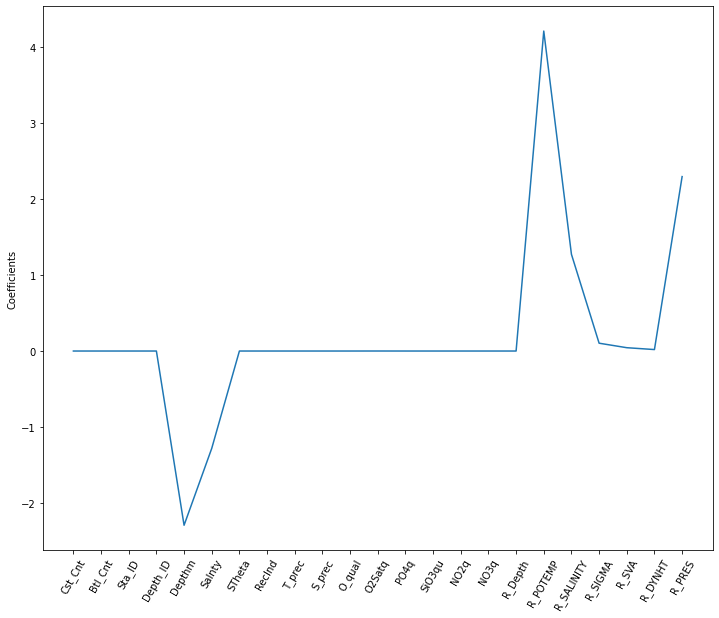

In [24]:
plt.figure(figsize=(12,10))
plt.plot(range(len(df_featurs)),lasso_coef['Alpha = 0.000400'])
plt.xticks(range(len(df_featurs)), df_featurs, rotation=60)
plt.ylabel('Coefficients')
plt.show()

3. Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown.

<AxesSubplot:>

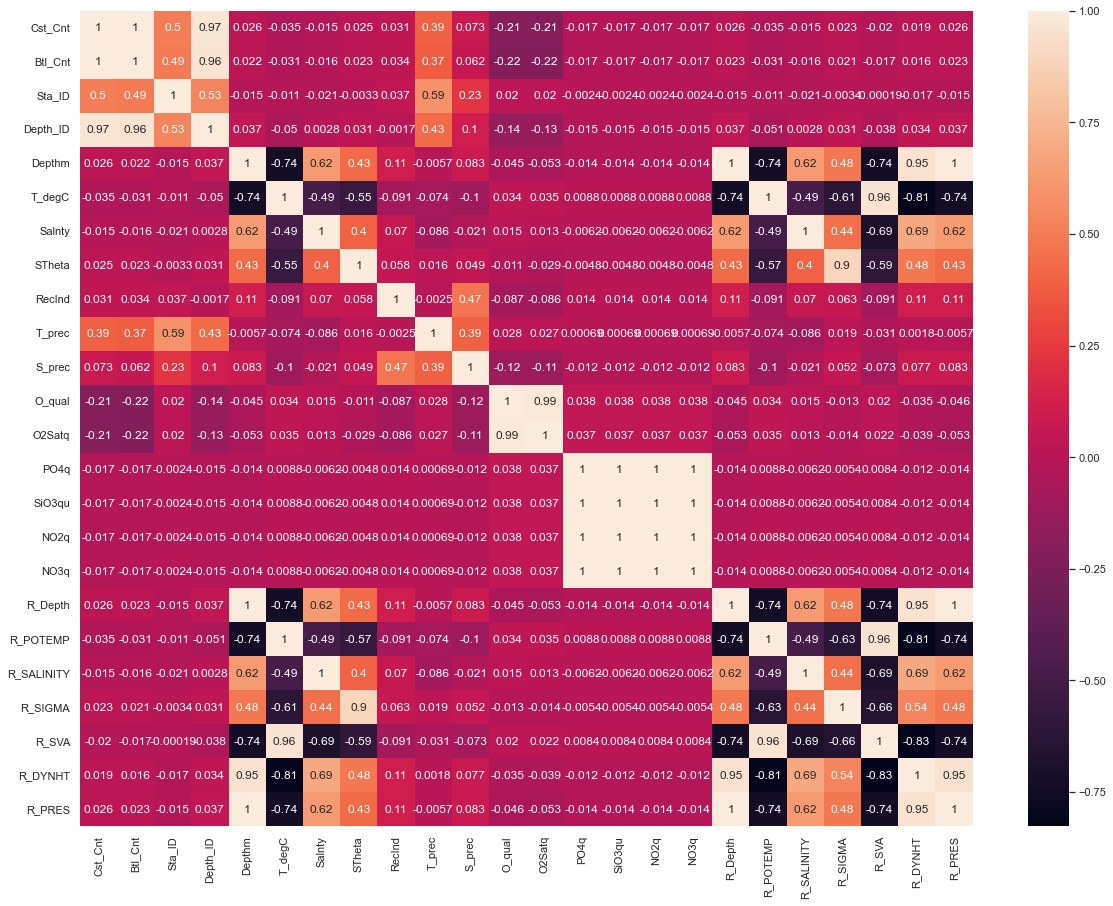

In [25]:
correlation = df_bottle.corr()
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(correlation,annot=True)

In [27]:
X = df_bottle[['Depthm','T_degC','R_SIGMA','R_DYNHT']]
y = df_bottle['Salnty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = regression.predict(X_test)
y_pred

array([34.01567565, 33.74680242, 33.57349823, ..., 33.83812807,
       33.58199635, 33.61153409])

In [30]:
accuracy_score = regression.score(X_test,y_test)
accuracy_score

0.49922926203095097

In [31]:
regression.coef_

array([-0.18052794,  0.16233014,  0.09959578,  0.56265312])

# Salnty = -6.60563606e-04* Depthm + 3.55472546e-02*T_degC + 5.20178920e-02*R_SIGMA + 1.47642762e+00*R_DYNHT

In [34]:
from statsmodels.formula.api import ols
df_bottle_vs_others = ols('Salnty ~ Depthm + T_degC + R_SIGMA + R_DYNHT', data = df_bottle).fit()
print(df_bottle_vs_others.params)

Intercept    31.666927
Depthm       -0.000661
T_degC        0.035547
R_SIGMA       0.052018
R_DYNHT       1.476428
dtype: float64


# Salnty = 31.666927 + -0.000661*Depthm + 0.035547 * T_degC + 0.052018 * R_SIGMA + 1.476428 * R_DYNHT

# 4. Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

When I did linear regression with one independent variable, accuracy score was 0.23. Now when I perform multiple linear regression with several independent variables, accuracy score is 0.52 which shows that multiple linear regression has a better performance compared to linear regression. 

# 5. Work with the diabetes dataset to perform multiple logistic regression.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss
from math import sqrt
import os # provides functions for interacting with the operating system

df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
X = np.array(df_diabetes.drop('Outcome',axis=1))
y = np.array(df_diabetes['Outcome']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
# predict - predict class labels for samples in X
y_ped = log_reg.predict(X_train) 
                      

In [39]:
# predict_proba - probability estimates
log_reg.predict_proba(X_train)

array([[0.95935056, 0.04064944],
       [0.80347428, 0.19652572],
       [0.50883321, 0.49116679],
       ...,
       [0.36107542, 0.63892458],
       [0.21590152, 0.78409848],
       [0.93342377, 0.06657623]])

In [40]:
# coef = coefficient of the features in the decision function
log_reg.coef_

array([[ 0.18823163,  1.13335776, -0.18631388, -0.02422067, -0.10468258,
         0.81150478,  0.14358094,  0.41370604]])

In [41]:
print('The Training Accuracy is:',log_reg.score(X_train,y_train))

The Training Accuracy is: 0.7821229050279329


In [42]:
# score - Returns the mean accuracy on the given test data and labels - below
print('The Test Accuracy is:',log_reg.score(X_test,y_test))

The Test Accuracy is: 0.7445887445887446


In [43]:
print(classification_report(y_train,y_ped))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       349
           1       0.74      0.58      0.65       188

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.77       537



In [44]:
def plot_confusion_matrix(cm,classes=None,title='confusion matrix'):
    '''Plots a confusion matrix.'''
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0,vmax=1.,annot=True,annot_kws={'size':50})
    else:
        sns.heatmap(cm,vmin=0,vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [45]:
cm = confusion_matrix(y_train,y_ped) # confusion matrix
cm_presen_total = cm / cm.sum(axis=1).reshape(-1,1)# precentege confusion matrix
cm_presen_total

array([[0.89111748, 0.10888252],
       [0.42021277, 0.57978723]])

In [46]:
log_reg.classes_

array([0, 1], dtype=int64)

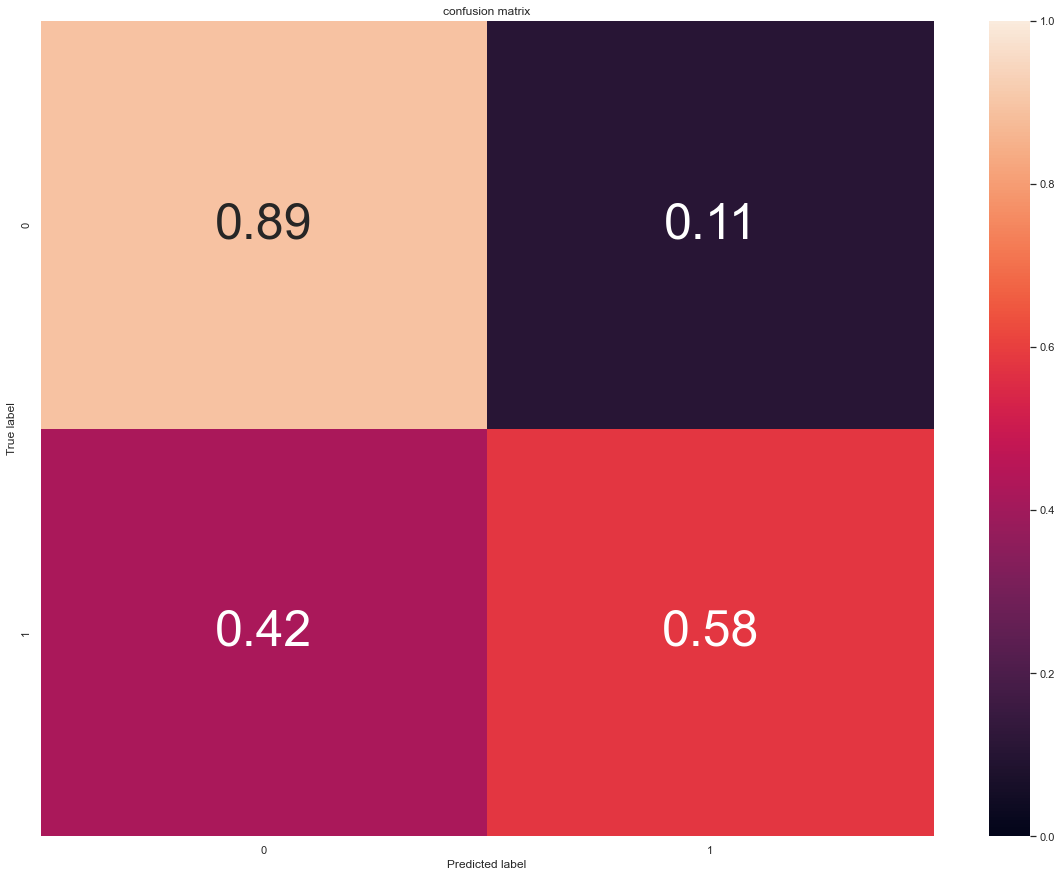

In [48]:
plot_confusion_matrix(cm_presen_total,classes = log_reg.classes_)

# 6. What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why?

The other ways to assess the performance of the model besides accuracy is Confusion matrix. Confusion matrix is a very intuitive cross tab of actual class values and predicted class values. It contains the count of observations that fall in each category.A good matrix (model) will have large values across the diagonal and small values off the diagonal.Let us see all the metrics that can be derived from confusion matrix and when to use them:

1.Accuracy — Ratio of correct predictions to total predictions.
Important when: you have symmetric datasets (FN & FP counts are close)
Used when: false negatives & false positives have similar costs.

Accuracy = (TP+TN)/(TP+FP+FN+TN)

2.Sensitivity/Recall — Ratio of true positives to total (actual) positives in the data.
Important when: identifying the positives is crucial.
Used when: the occurrence of false negatives is unacceptable/intolerable. You’d rather have some extra false positives (false alarms) over saving some false negatives. For example, when predicting financial default or a deadly disease.

Sensitivity or Recall = TP/(TP+FN)

3.Precision — Ratio of true positives to total predicted positives.
Important when: you want to be more confident of your predicted positives.
Used when: the occurrence of false positives is unacceptable/intolerable. For example, Spam emails. You’d rather have some spam emails in your inbox than miss out some regular emails that were incorrectly sent to your spam box.

Precision = TP/(TP+FP)

4.Specificity — Ratio of true negatives to total negatives in the data.
Important when: you want to cover all true negatives.
Used when: you don’t want to raise false alarms. For example, you’re running a drug test in which all people who test positive will immediately go to jail.

Specificity = TN/(TN+FP)

5.F1-Score — Considers both precision and recall. It’s the harmonic mean of the precision and recall.
Important when: you have an uneven class distribution.
Used when: the cost of false positives and false negatives are different. F1 score conveys the balance between the precision and the recall. It is higher if there is a balance between Precision and Recall. F1 Score isn’t so high if one of these measures, Precision or Recall, is improved at the expense of the other.


F1 Score = 2*(Recall * Precision) / (Recall + Precision)


Sensitivity/Recall approach makes the most sense with the diabetes dataset because Diabetes dataset is about health and identifying all the positives is crucial.The occurrence of false negatives is unacceptable/intolerable since undetected and  untreated patients may be at risk of worsening their illess or even death. That's why we'd rather have some extra false positives (false alarms) over saving some false negatives.  

# 7. Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss
from math import sqrt
import os # provides functions for interacting with the operating system

df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
X = np.array(df_diabetes.drop('Outcome',axis=1))
y = np.array(df_diabetes['Outcome']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [51]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [52]:
# predict - predict class labels for samples in X
y_ped = log_reg.predict(X_train) 
                      

In [53]:
# predict_proba - probability estimates
pred_proba = log_reg.predict_proba(X_train)
pred_proba

array([[0.95935056, 0.04064944],
       [0.80347428, 0.19652572],
       [0.50883321, 0.49116679],
       ...,
       [0.36107542, 0.63892458],
       [0.21590152, 0.78409848],
       [0.93342377, 0.06657623]])

In [54]:
# coef = coefficient of the features in the decision function
log_reg.coef_

array([[ 0.18823163,  1.13335776, -0.18631388, -0.02422067, -0.10468258,
         0.81150478,  0.14358094,  0.41370604]])

In [55]:
print('The Training Accuracy is:',log_reg.score(X_train,y_train))

The Training Accuracy is: 0.7821229050279329


In [56]:
# score - Returns the mean accuracy on the given test data and labels - below
print('The Test Accuracy is:',log_reg.score(X_test,y_test))

The Test Accuracy is: 0.7445887445887446


In [57]:
print(classification_report(y_train,y_ped))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       349
           1       0.74      0.58      0.65       188

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.77       537



In [58]:
cm = confusion_matrix(y_train,y_ped) # confusion matrix
cm_presen_total = cm / cm.sum(axis=1).reshape(-1,1)# precentege confusion matrix
cm_presen_total

array([[0.89111748, 0.10888252],
       [0.42021277, 0.57978723]])

In [59]:
log_reg.classes_

array([0, 1], dtype=int64)

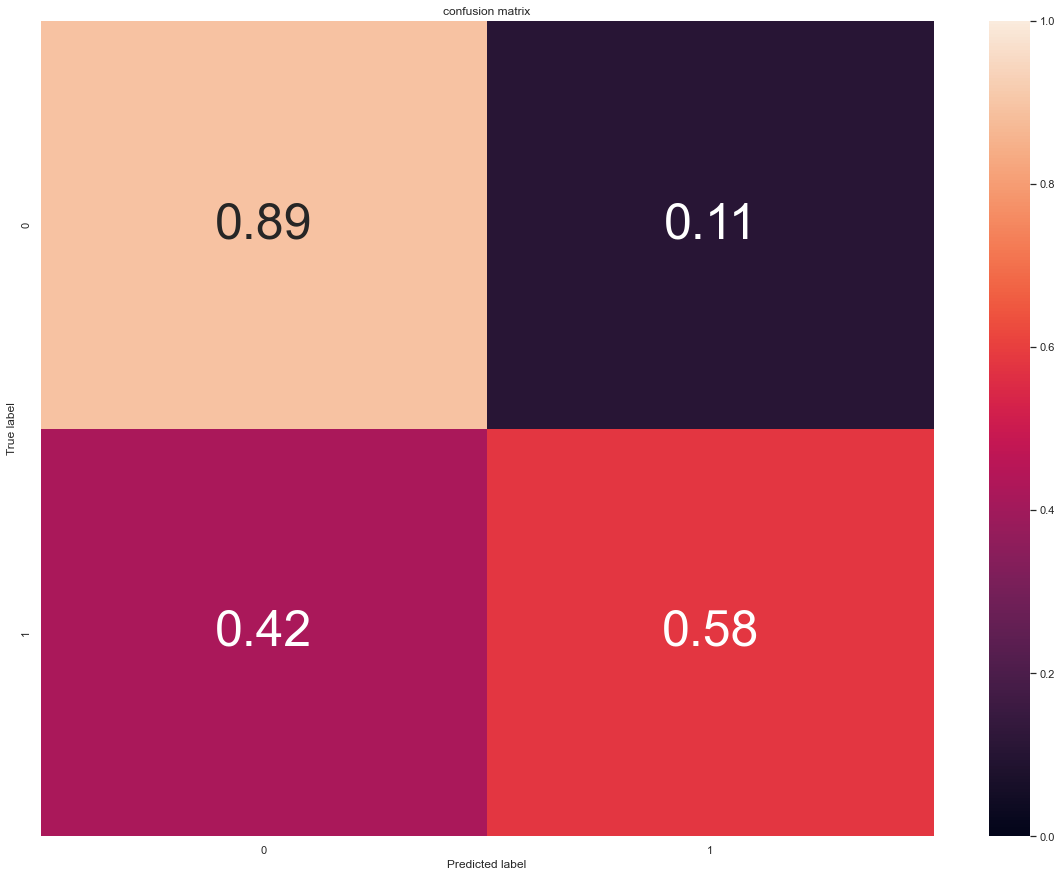

In [60]:
plot_confusion_matrix(cm_presen_total,classes = log_reg.classes_)

Logarithmic loss-or Log Loss 
- Log loss is an error metric
- this is the loss function used in (multinomil) logistic regression and extensions of it such as netural networks, defined as the negative log-likeihood of the true labels given probabilistic classifier's predictions.
- Why it's important? For example, imagine having 2 models/ classifiers that both predict one observation correctly.However,1 classifier has a predicted probability of 0.54 and the other 0.95 which one will you choose? Classification Accuracy will not help here as it will get both on 100%

In [61]:
print('The log loss on Training ',log_loss(y_train, pred_proba))

The log loss on Training  0.4594340548193499


In [62]:
# probabality on unseen data 
pred_proba_t = log_reg.predict_proba(X_test)

print('The log loss on Testing dataset is: ',log_loss(y_test, pred_proba_t)) # on unseen data we can see that we have improvement

The log loss on Testing dataset is:  0.5197723864272008


# Parameter Tuning
- we will loop over parameter C (Inverse of regularization strength).
- Inverse of regularization strength helps to avoid overfitting - it penalizes large value of your parameters
- it also helps to find Global Minimum by moving to better 'solutions' from local minimum to global minimum
- The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5


In [64]:
np.geomspace(1e-5,1e5,num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

In [65]:
C_list = np.geomspace(1e-5,1e5,num=20)
CA = []
Logarithmic_loss = []

for c in C_list:
    log_reg_2 = LogisticRegression(C=c)
    log_reg_2.fit(X_train,y_train)
    score = log_reg_2.score(X_test,y_test)
    CA.append(score)
    print('The CA of c parameter {} is {}:'.format(c,score))
    pred_proba_t = log_reg_2.predict_proba(X_test)
    log_loss_2 = log_loss(y_test, pred_proba_t)
    Logarithmic_loss.append(log_loss_2)
    print('The logg loss of c parameter {} is {}:'.format(c,log_loss_2))
    print('')

The CA of c parameter 1e-05 is 0.6536796536796536:
The logg loss of c parameter 1e-05 is 0.6446432366639361:

The CA of c parameter 3.359818286283781e-05 is 0.6536796536796536:
The logg loss of c parameter 3.359818286283781e-05 is 0.6434139141131697:

The CA of c parameter 0.00011288378916846884 is 0.6536796536796536:
The logg loss of c parameter 0.00011288378916846884 is 0.639427387221564:

The CA of c parameter 0.000379269019073225 is 0.6536796536796536:
The logg loss of c parameter 0.000379269019073225 is 0.6274834226721112:

The CA of c parameter 0.0012742749857031334 is 0.6536796536796536:
The logg loss of c parameter 0.0012742749857031334 is 0.5989163621461905:

The CA of c parameter 0.004281332398719391 is 0.7229437229437229:
The logg loss of c parameter 0.004281332398719391 is 0.5564621561130869:

The CA of c parameter 0.01438449888287663 is 0.7748917748917749:
The logg loss of c parameter 0.01438449888287663 is 0.5236635449532121:

The CA of c parameter 0.04832930238571752 is 

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: D

In [66]:
# putting outcomes in atable
# reshape
CA2 = np.array(CA).reshape(20,)
Logarithmic_loss2 = np.array(Logarithmic_loss).reshape(20,)
# zip
outcomes = zip(C_list,CA2,Logarithmic_loss2)
# df 
df_outcomes = pd.DataFrame(outcomes,columns = ['C_list','CA2','Logarithmic_loss2'])
# print result
df_outcomes
# ordering the data (sort_values)
df_outcomes.sort_values('Logarithmic_loss2',ascending=True).reset_index()
# I get highest Accuraccy(ca2)0.75,Logarithmic_loss2- lowest 
# log_loss should be lower.

,index,C_list,CA2,Logarithmic_loss2
0,7,0.048329,0.753247,0.513149
1,8,0.162378,0.740260,0.515522
2,9,0.545559,0.744589,0.518837
3,10,1.832981,0.744589,0.520336
4,11,6.158482,0.744589,0.520845
5,12,20.691381,0.744589,0.521002
6,13,69.519280,0.744589,0.521049
7,14,233.572147,0.744589,0.521064
8,15,784.759970,0.744589,0.521068
9,16,2636.650899,0.744589,0.521069


c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 1e-05 is 0.6536796536796536:
The logg loss of c parameter 1e-05 is 0.6446432366639361:



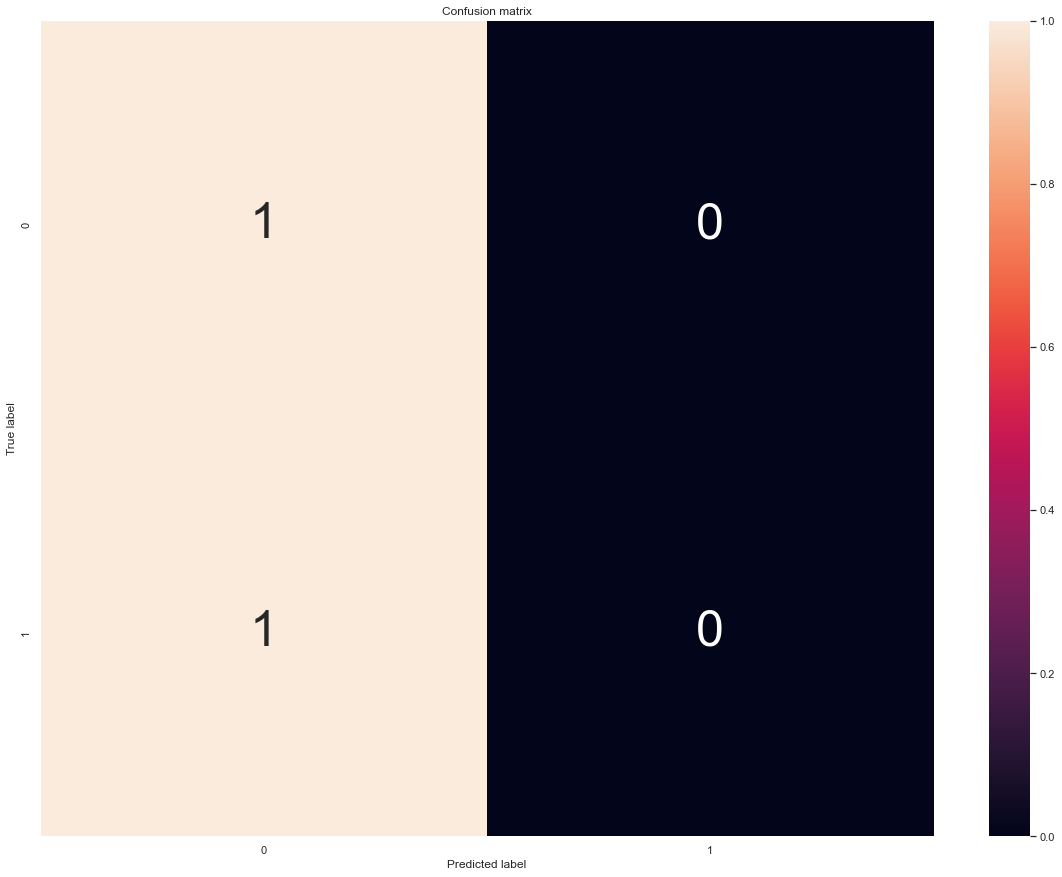

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 3.359818286283781e-05 is 0.6536796536796536:
The logg loss of c parameter 3.359818286283781e-05 is 0.6434139141131697:



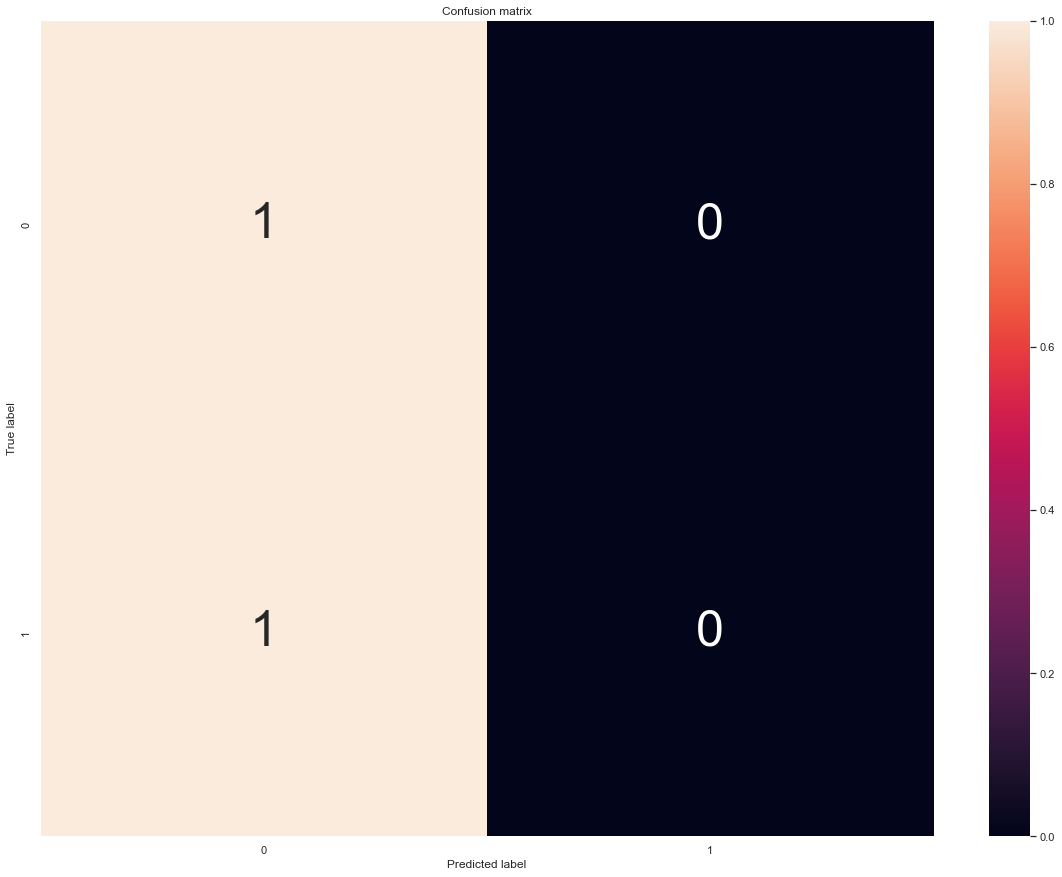

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 0.00011288378916846884 is 0.6536796536796536:
The logg loss of c parameter 0.00011288378916846884 is 0.639427387221564:



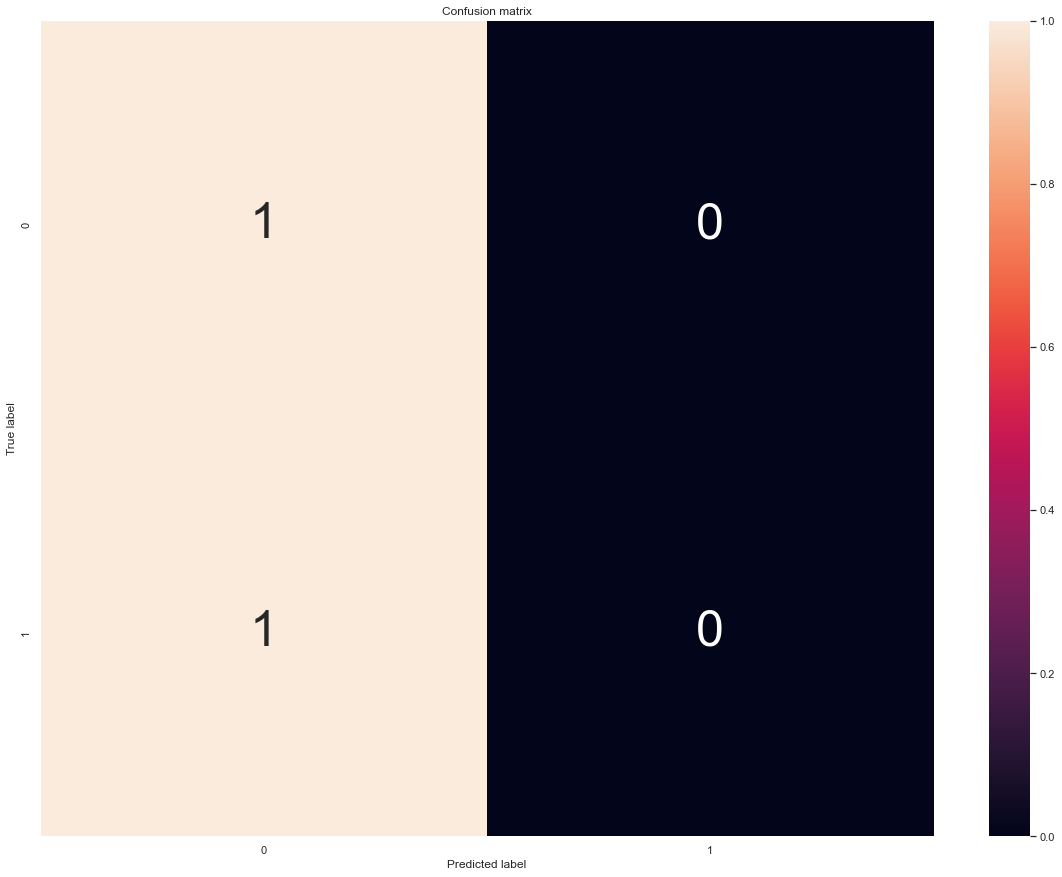

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 0.000379269019073225 is 0.6536796536796536:
The logg loss of c parameter 0.000379269019073225 is 0.6274834226721112:



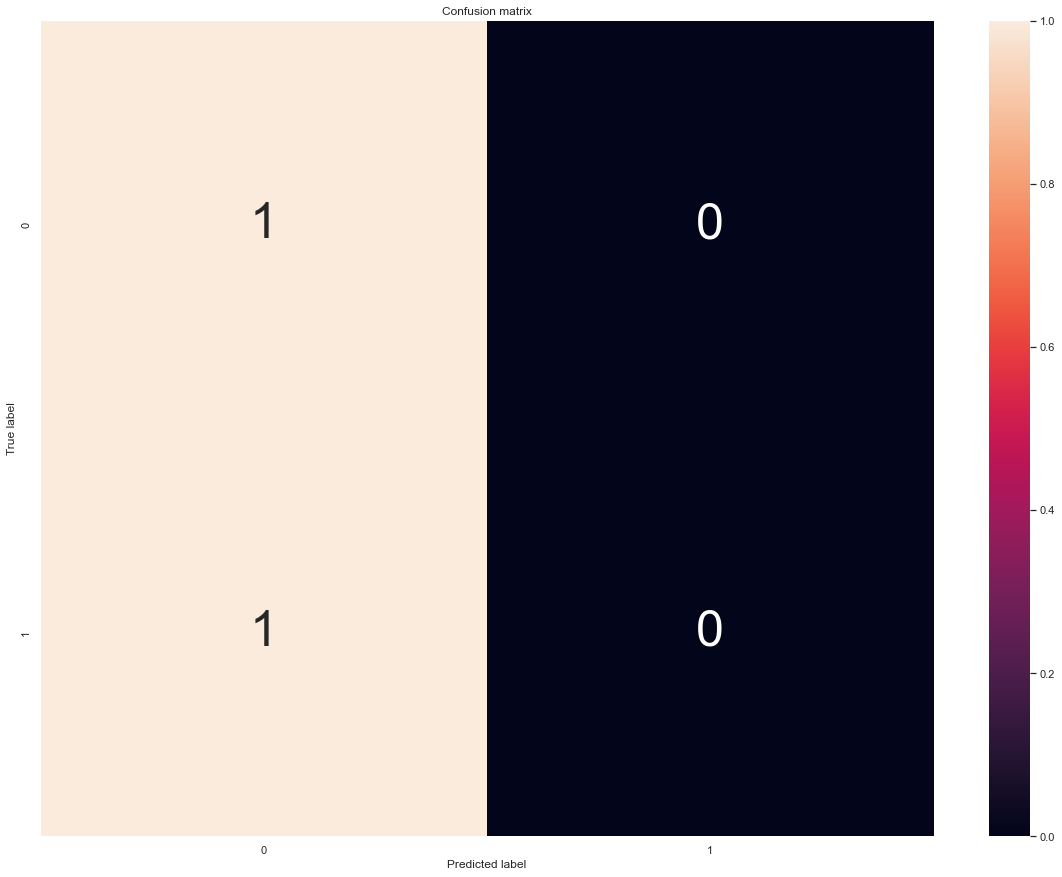

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 0.0012742749857031334 is 0.6536796536796536:
The logg loss of c parameter 0.0012742749857031334 is 0.5989163621461905:



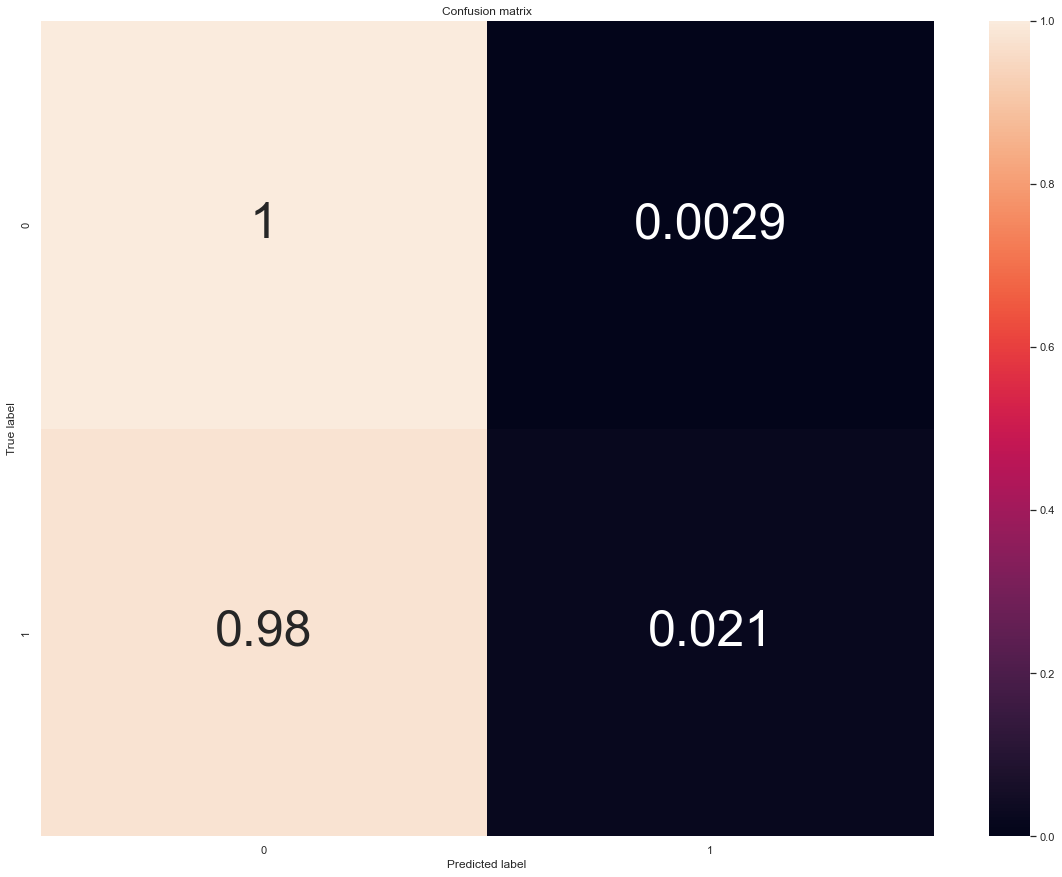

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 0.004281332398719391 is 0.7229437229437229:
The logg loss of c parameter 0.004281332398719391 is 0.5564621561130869:



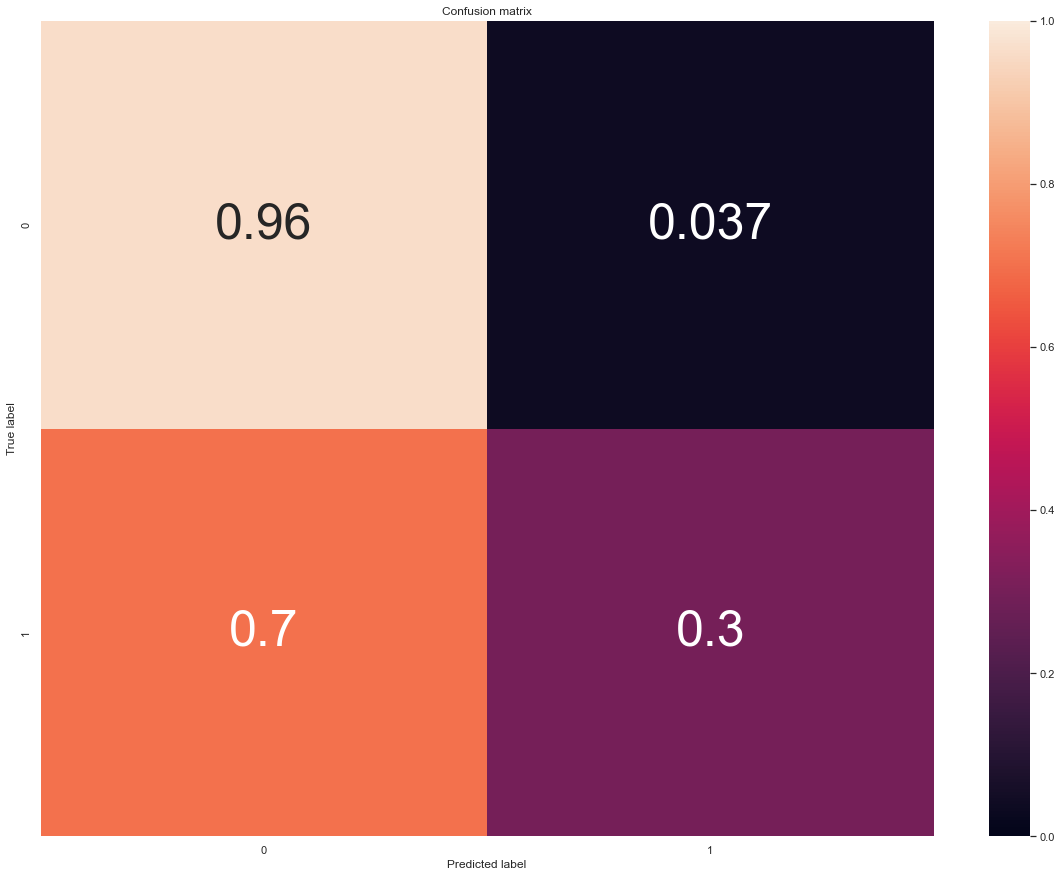

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 0.01438449888287663 is 0.7748917748917749:
The logg loss of c parameter 0.01438449888287663 is 0.5236635449532121:



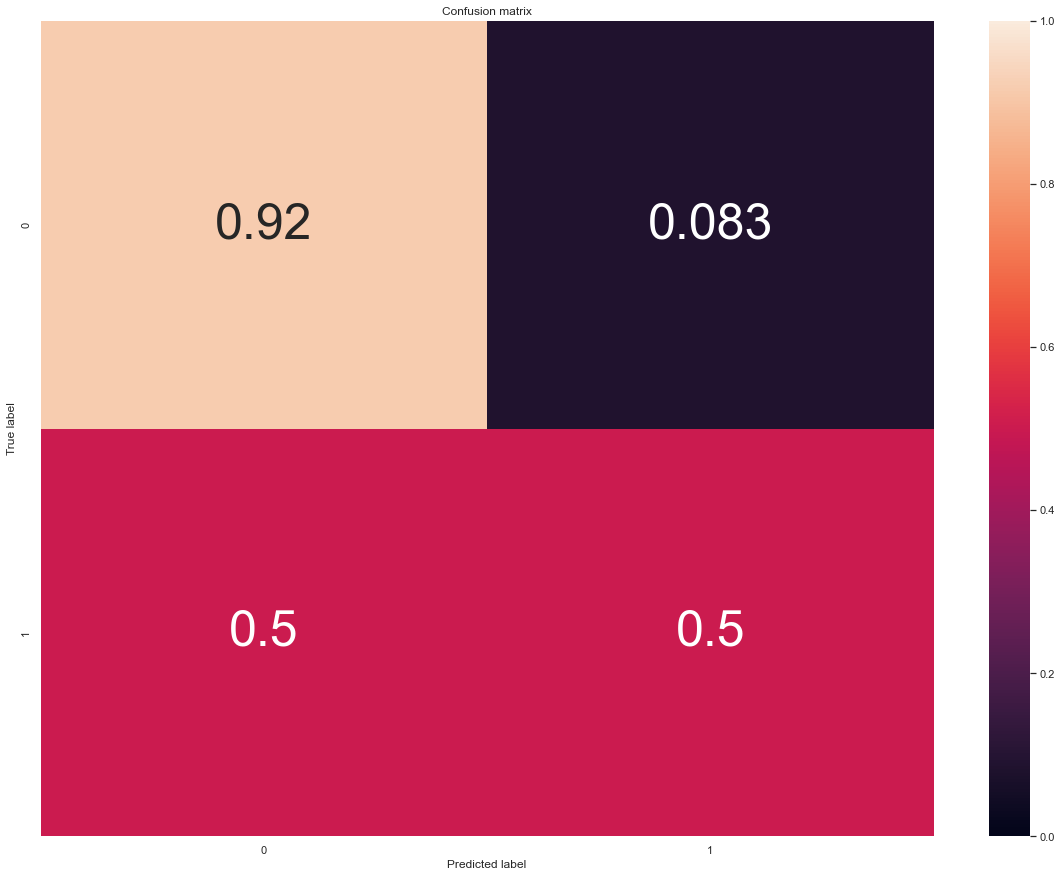

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 0.04832930238571752 is 0.7532467532467533:
The logg loss of c parameter 0.04832930238571752 is 0.5131492957540913:



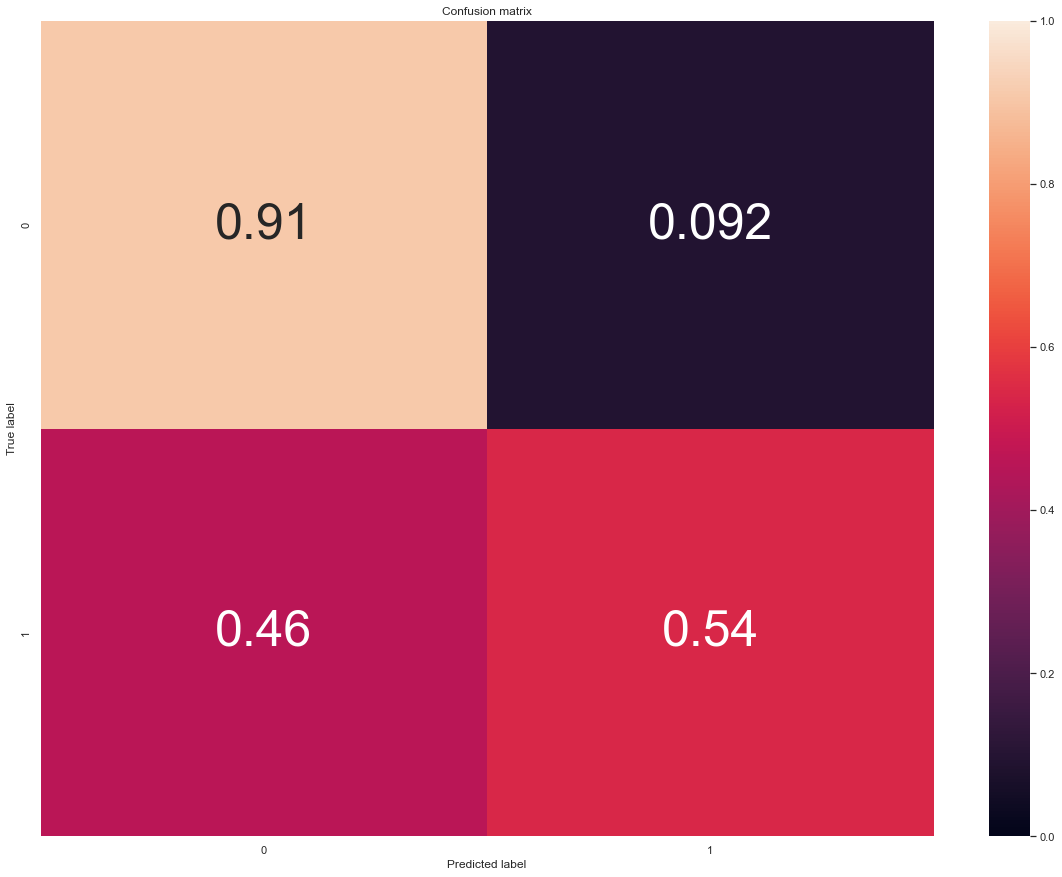

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 0.1623776739188721 is 0.7402597402597403:
The logg loss of c parameter 0.1623776739188721 is 0.515521547540949:



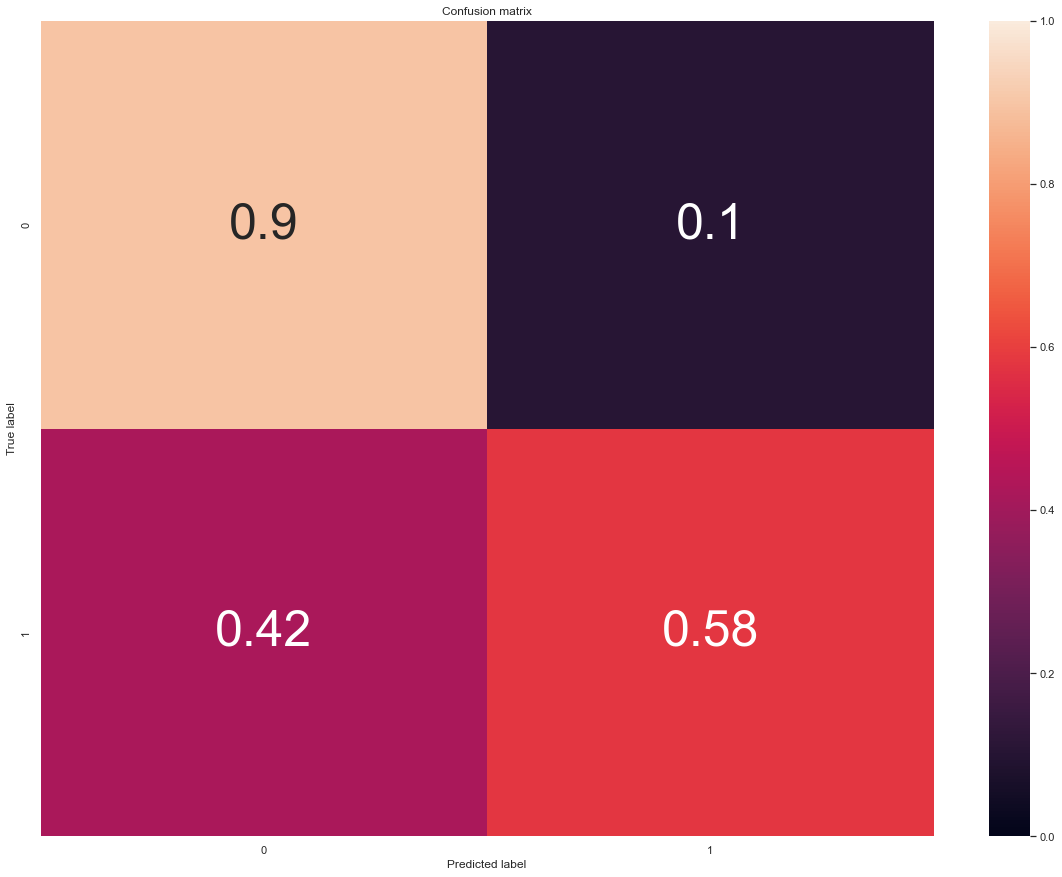

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 0.5455594781168515 is 0.7445887445887446:
The logg loss of c parameter 0.5455594781168515 is 0.5188374346197513:



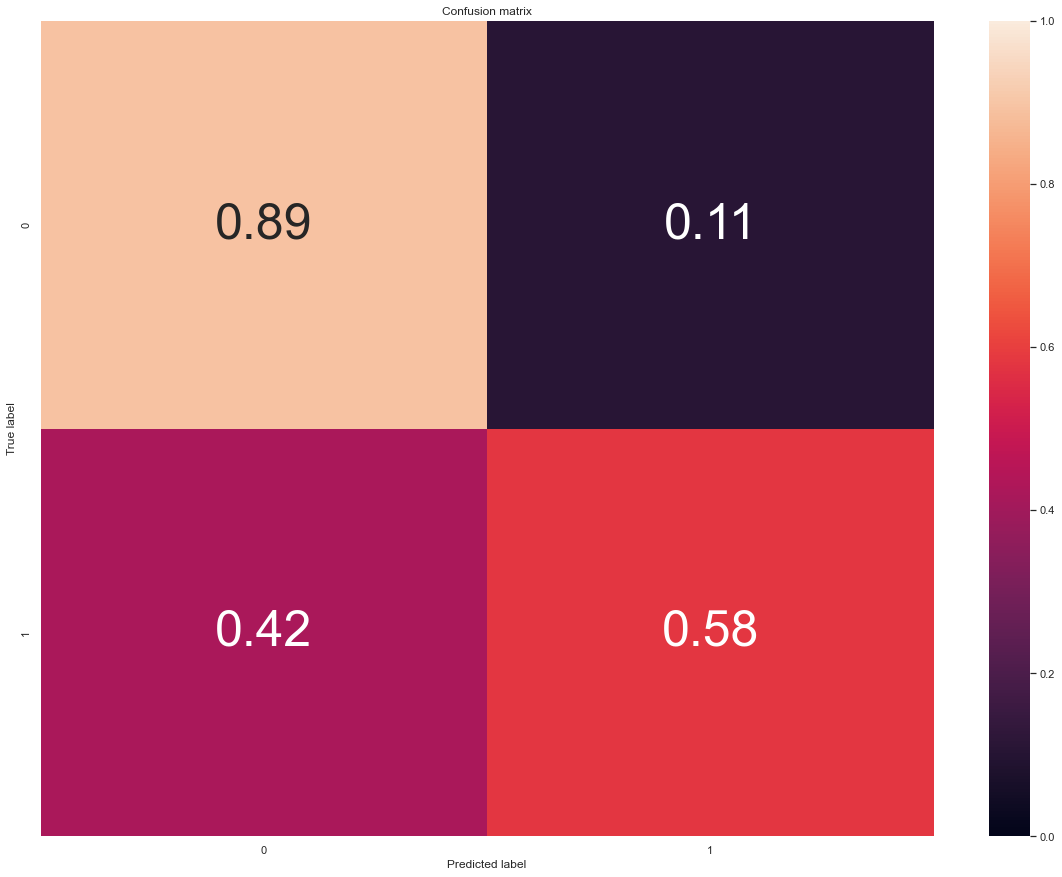

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 1.8329807108324339 is 0.7445887445887446:
The logg loss of c parameter 1.8329807108324339 is 0.5203364209885357:



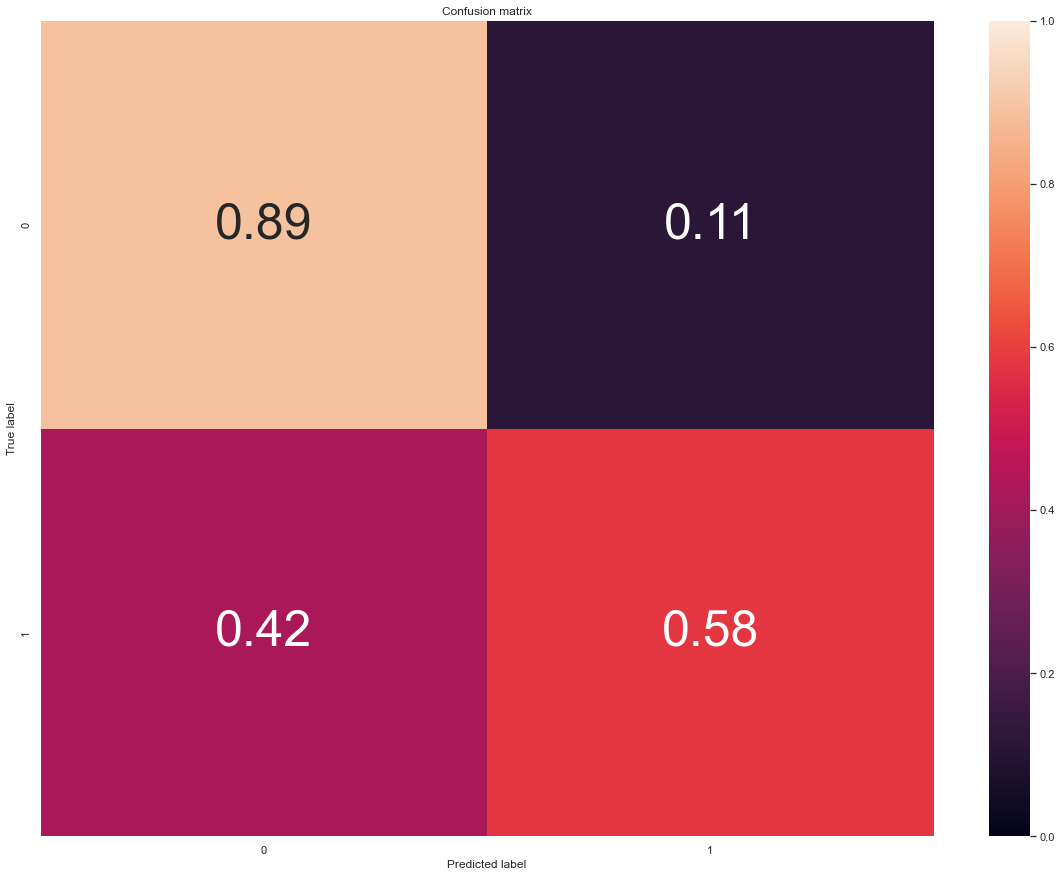

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 6.1584821106602545 is 0.7445887445887446:
The logg loss of c parameter 6.1584821106602545 is 0.5208446715038356:



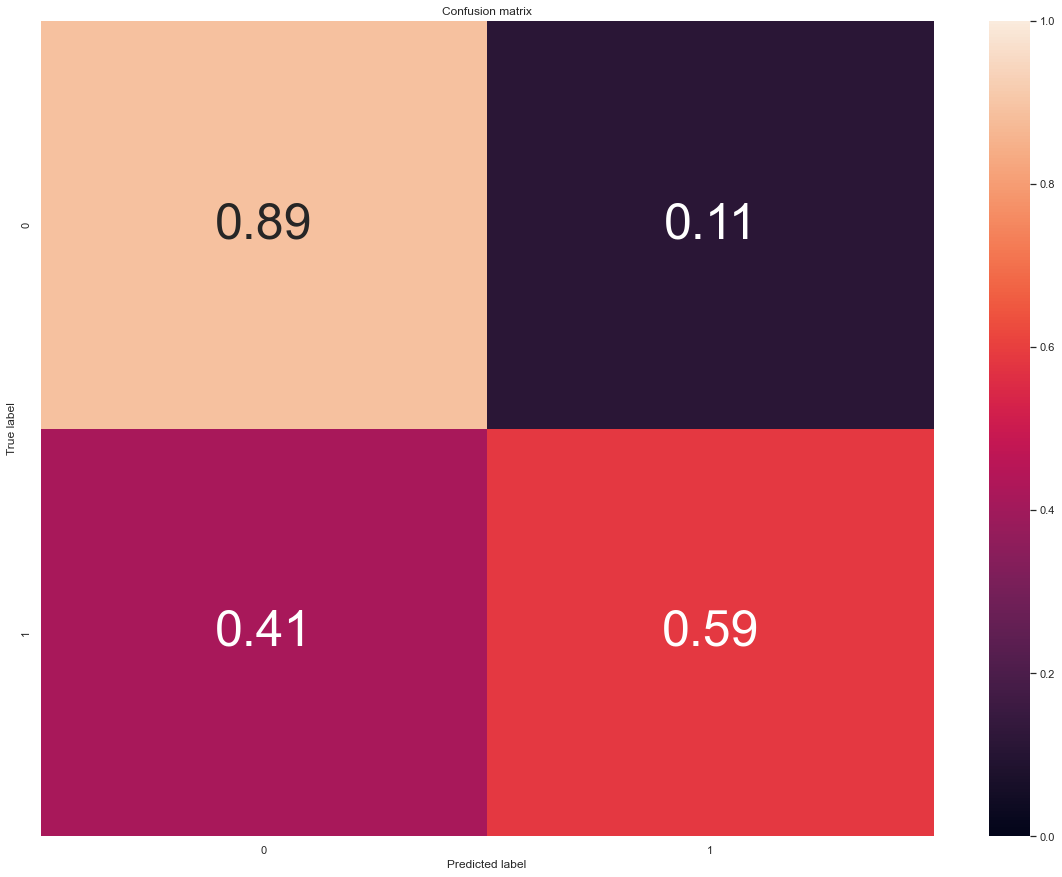

The CA of c parameter 20.6913808111479 is 0.7445887445887446:
The logg loss of c parameter 20.6913808111479 is 0.5210020577651185:



c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


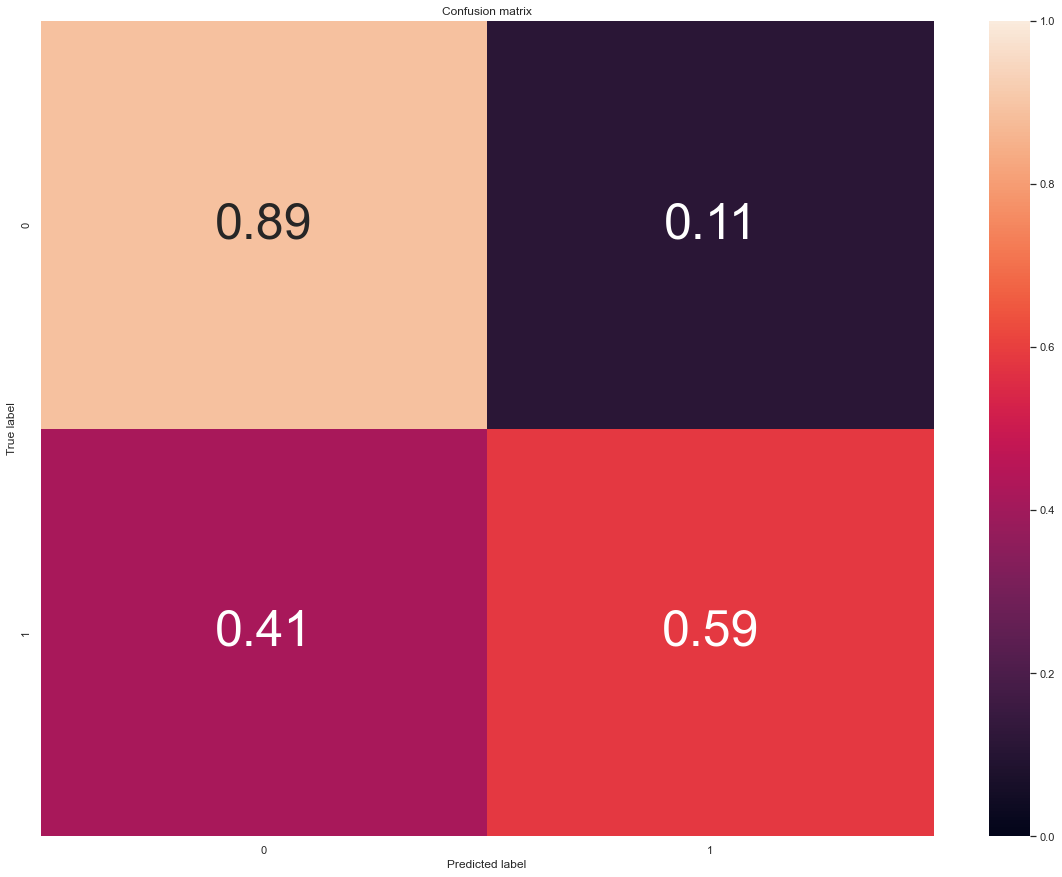

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 69.51927961775606 is 0.7445887445887446:
The logg loss of c parameter 69.51927961775606 is 0.5210494610008688:



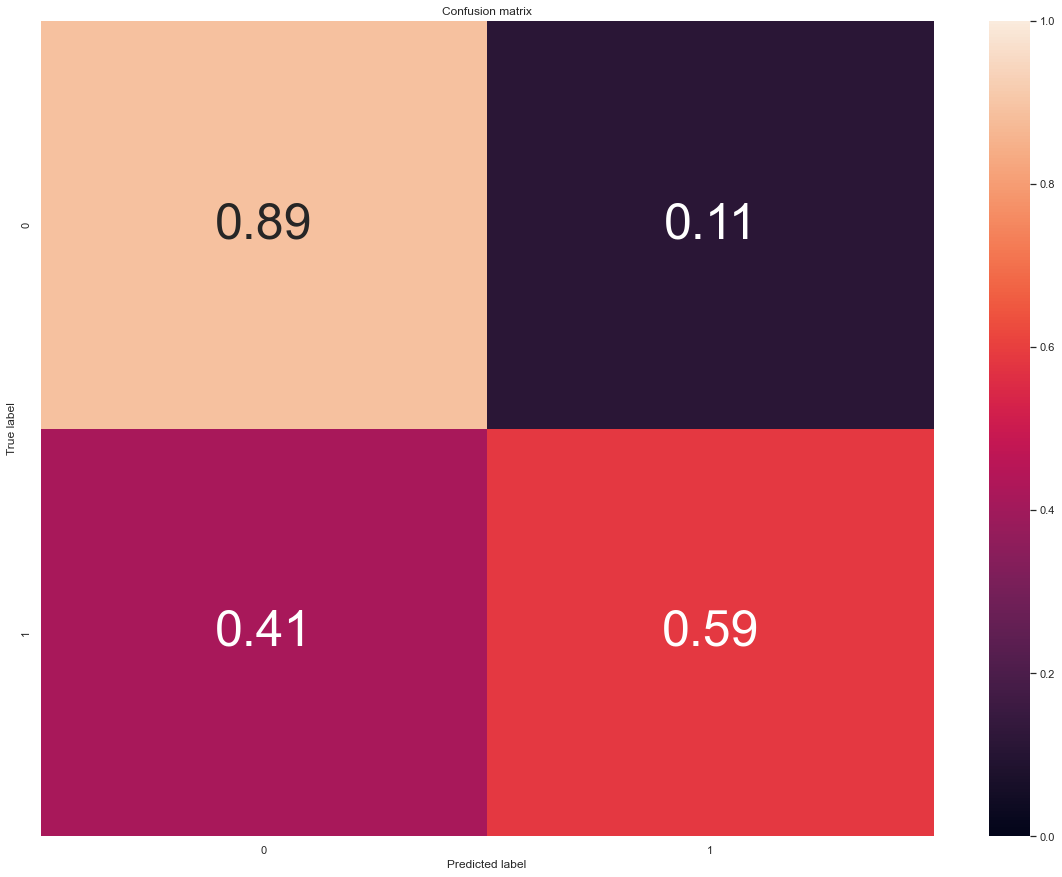

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 233.57214690901213 is 0.7445887445887446:
The logg loss of c parameter 233.57214690901213 is 0.5210636199304451:



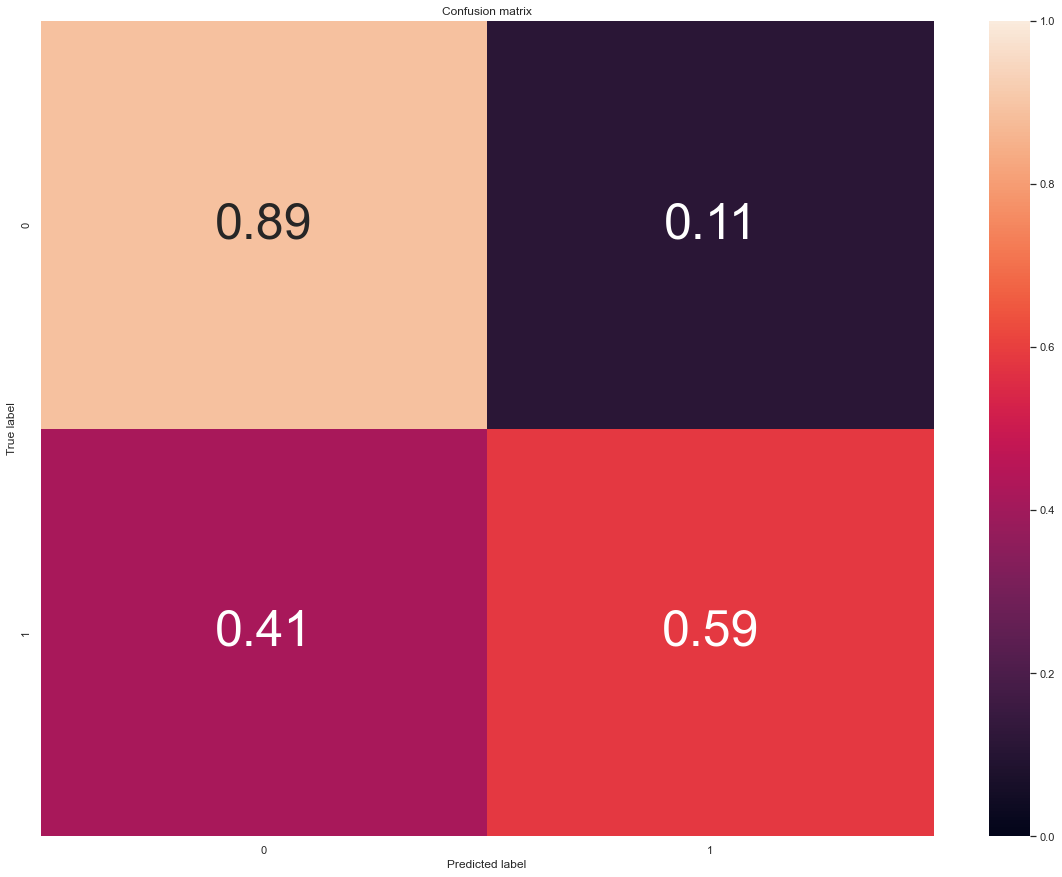

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 784.7599703514607 is 0.7445887445887446:
The logg loss of c parameter 784.7599703514607 is 0.5210678385732992:



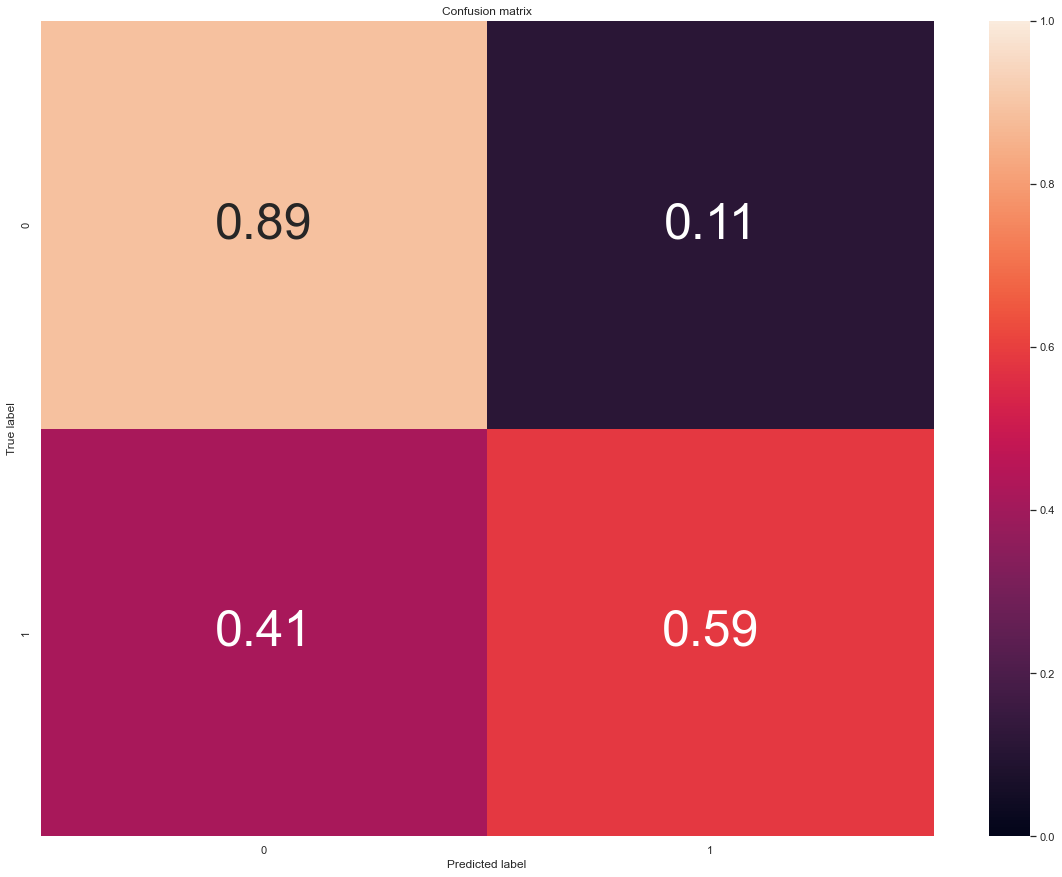

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 2636.6508987303555 is 0.7445887445887446:
The logg loss of c parameter 2636.6508987303555 is 0.5210690945840363:



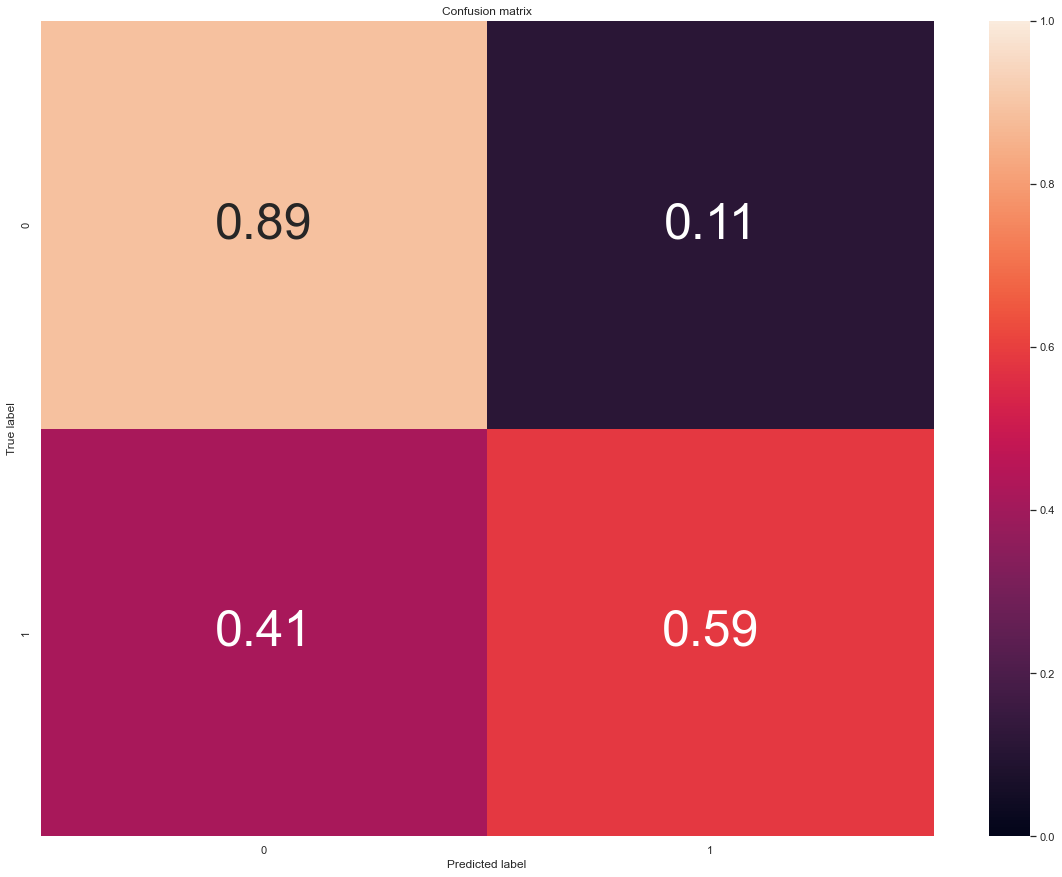

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 8858.667904100832 is 0.7445887445887446:
The logg loss of c parameter 8858.667904100832 is 0.5210694684519176:



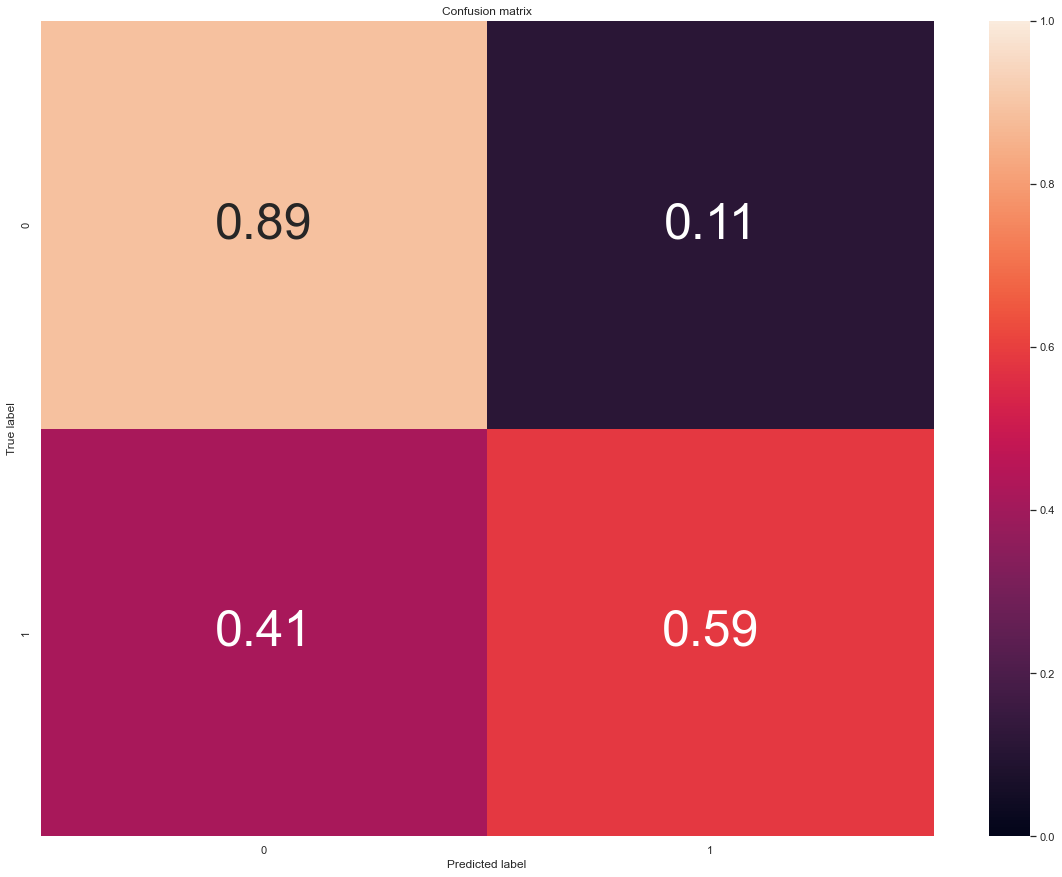

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 29763.51441631313 is 0.7445887445887446:
The logg loss of c parameter 29763.51441631313 is 0.5210695797312341:



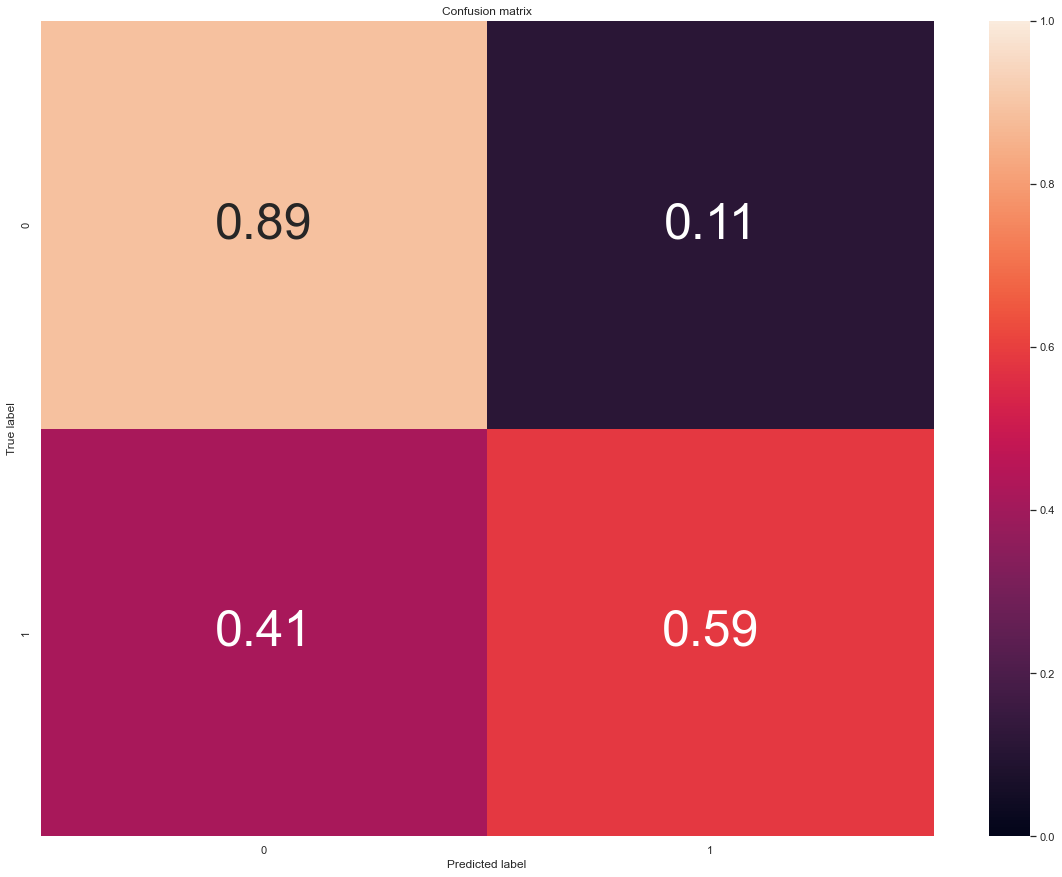

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The CA of c parameter 100000.0 is 0.7445887445887446:
The logg loss of c parameter 100000.0 is 0.5210696128521438:



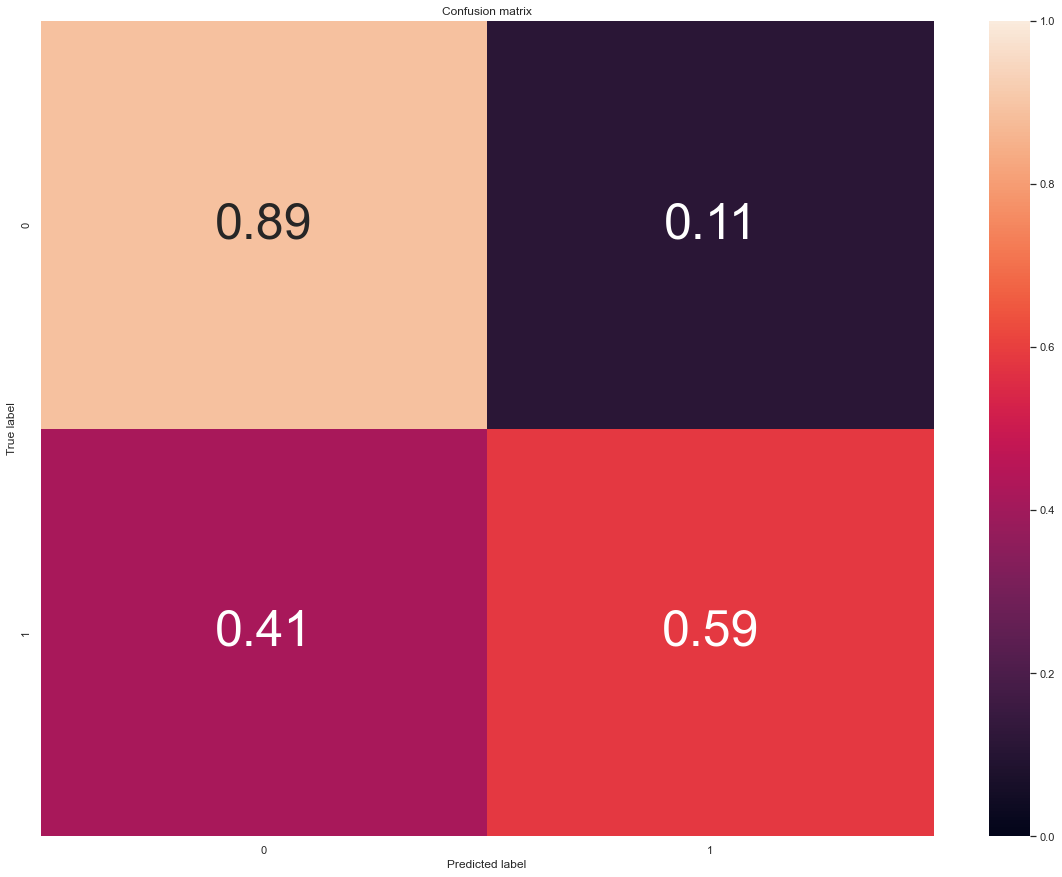

In [67]:
CA = []
Logarithmic_loss = []

for c in C_list:
    log_reg_2 = LogisticRegression(C=c)
    log_reg_2.fit(X_train,y_train)
    score = log_reg_2.score(X_test,y_test)
    CA.append(score)
    print('The CA of c parameter {} is {}:'.format(c,score))
    pred_proba_t = log_reg_2.predict_proba(X_test)
    log_loss_2 = log_loss(y_test, pred_proba_t)
    Logarithmic_loss.append(log_loss_2)
    print('The logg loss of c parameter {} is {}:'.format(c,log_loss_2))
    print('')
    # plot all c_list 
    y_ped = log_reg_2.predict(X_train)
    cm = confusion_matrix(y_train,y_ped) # confusion matrix
    cm_presen_total = cm / cm.sum(axis=1).reshape(-1,1)# precentege confusion matrix
    plot_confusion_matrix(cm_presen_total,classes = log_reg.classes_,title = 'Confusion matrix')
    plt.show()

# 8. Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell?

# KNN model

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df_diabetes.drop('Outcome',axis=1)
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardization-transforming values so mean is 0 and SD is 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)

[0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [69]:
print(knn.score(X_test,y_test))

0.7142857142857143


In [70]:
diabetes_pred_df = pd.DataFrame(X_test, columns = df_diabetes.columns[0:8])
diabetes_pred_df['Actual_Outcome'] = y_test.tolist()
diabetes_pred_df['Predicted_Outcome'] = y_predict.tolist()

diabetes_pred_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual_Outcome,Predicted_Outcome
0,0.523387,-0.739446,-0.444600,0.720042,0.956067,0.232733,-0.152282,0.786051,0,0
1,-0.590921,-0.289349,0.329998,0.661122,-0.691043,0.433777,-1.077306,-1.059081,0,0
2,-0.590921,-0.417948,-0.171213,-1.224301,-0.691043,-0.145702,-1.044503,-1.059081,0,0
3,1.080541,-0.450098,0.557822,-1.224301,-0.691043,-0.878919,1.245094,0.031224,0,0
4,0.801964,0.482248,1.013468,-1.224301,-0.691043,-0.252136,-0.873932,1.373138,0,1
5,0.523387,-0.578697,0.193304,0.661122,0.956067,0.670299,-0.499986,1.792486,0,0
6,-0.869498,-1.607492,-0.900247,-0.163750,-0.032199,-1.375615,-0.503266,-0.975211,0,0
7,-1.148075,-0.128599,-3.087349,-1.224301,-0.691043,0.209081,1.494391,0.869920,0,0
8,-0.033767,1.060945,0.193304,0.484364,0.401251,-0.086571,-0.454063,0.282833,0,1
9,0.244810,0.835896,0.466692,-1.224301,-0.691043,0.197255,-0.847690,2.631182,0,1


In [71]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predict)

array([[126,  25],
       [ 41,  39]], dtype=int64)

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


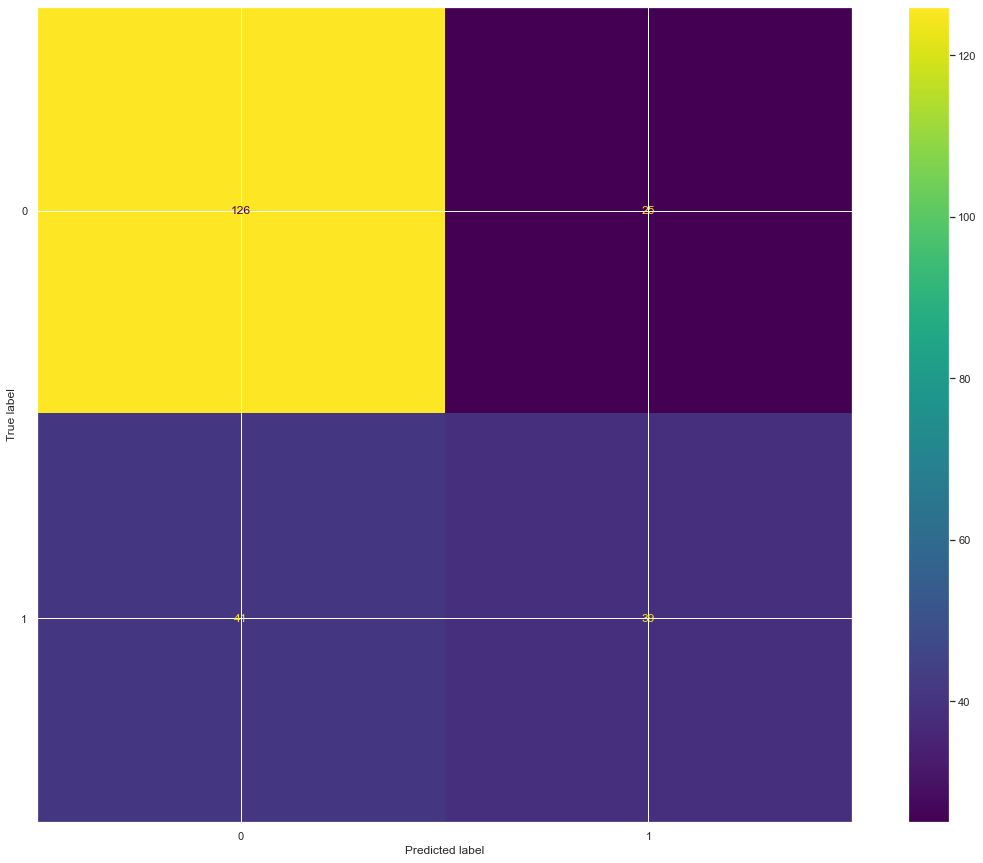

In [73]:
plot_confusion_matrix(knn, X_test, y_test)

# Sensitivity/Recall

In [74]:
sensitivity_Knn = 39 /(39+41)
sensitivity_Knn

0.4875

# multiple logistic regression model

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss
from math import sqrt
import os # provides functions for interacting with the operating system

df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [89]:
X = np.array(df_diabetes.drop('Outcome',axis=1))
y = np.array(df_diabetes['Outcome']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [90]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [91]:
# predict - predict class labels for samples in X
y_ped = log_reg.predict(X_train) 
y_ped                      

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [92]:
# predict_proba - probability estimates
log_reg.predict_proba(X_train)

array([[0.95935056, 0.04064944],
       [0.80347428, 0.19652572],
       [0.50883321, 0.49116679],
       ...,
       [0.36107542, 0.63892458],
       [0.21590152, 0.78409848],
       [0.93342377, 0.06657623]])

In [93]:
# coef = coefficient of the features in the decision function
log_reg.coef_

array([[ 0.18823163,  1.13335776, -0.18631388, -0.02422067, -0.10468258,
         0.81150478,  0.14358094,  0.41370604]])

In [94]:
print('The Training Accuracy is:',log_reg.score(X_train,y_train))

The Training Accuracy is: 0.7821229050279329


In [95]:
# score - Returns the mean accuracy on the given test data and labels - below
print('The Test Accuracy is:',log_reg.score(X_test,y_test))

The Test Accuracy is: 0.7445887445887446


In [96]:
print(classification_report(y_train,y_ped))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       349
           1       0.74      0.58      0.65       188

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.77       537



In [97]:
cm = confusion_matrix(y_train,y_ped) # confusion matrix
cm_presen_total = cm / cm.sum(axis=1).reshape(-1,1)# precentege confusion matrix
cm_presen_total

array([[0.89111748, 0.10888252],
       [0.42021277, 0.57978723]])

In [99]:
TP = cm_presen_total[1,1]
FN = cm_presen_total[1,0]
sensitivity = TP /(TP+FN)
sensitivity

0.5797872340425532

# multiple logistic regression model performed better for the diabetes dataset - its Sensitivity outcome is higher then KNN's Sensitivity. 

-KNN is a non-parametric model, where LR is a parametric model.
-KNN is comparatively slower than Logistic Regression.
-KNN supports non-linear solutions where LR supports only linear solutions.
-LR can derive confidence level (about its prediction), whereas KNN can only output the labels.


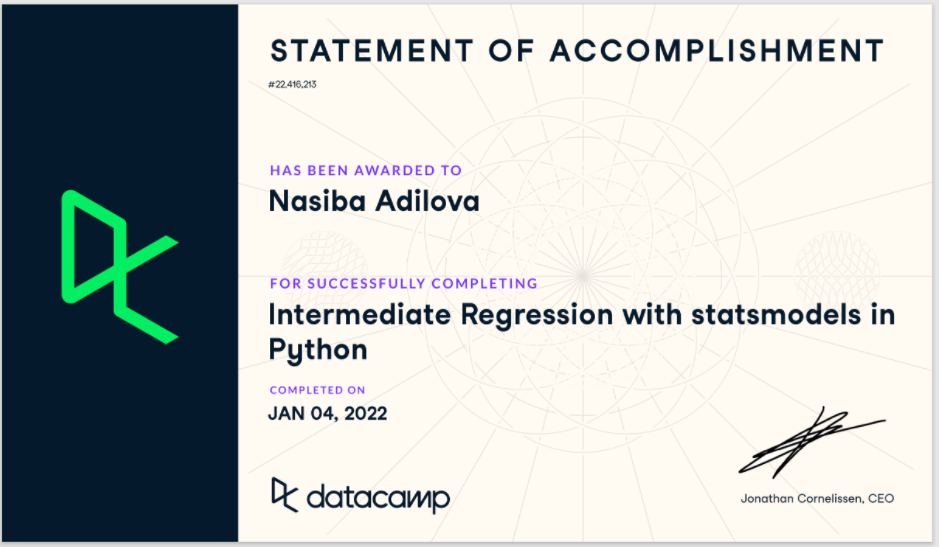